# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows=100
pd.options.display.max_columns=100
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
#to hide warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df1 = pd.read_csv(r'C:\Users\shubh\OneDrive\Documents\housing.csv', encoding = 'utf-8')

In [3]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Data Cleaning

In [4]:
df1.shape

(1460, 81)

In [5]:
df1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
df1.isnull().sum()/len(df1)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [8]:
df1.columns[df1.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price. 
#### Hence, we will first impute the categorical variables with 'None'

In [9]:
cat_with_null = ['Alley', 'MasVnrType', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'FireplaceQu',
                 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence','MiscFeature']
for i in cat_with_null:
    df1[i].fillna("none", inplace=True)

In [10]:
df1.columns[df1.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [11]:
null = df1.isnull().sum()/len(df1)*100
null = null[null>0]
null.sort_values(ascending=False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [12]:
num_with_null = ['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt']
for i in num_with_null:
    print(df1[i].describe())
    print('----------------------------------------')

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
----------------------------------------
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
----------------------------------------
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
----------------------------------------
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
----------------------------------------


In [13]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
# Imputing MasVnrArea and GarageYrBlt with the median values
df1['LotFrontage'] = df1.groupby("Neighborhood")['LotFrontage'].transform(lambda x:x.fillna(x.median()))
df1['MasVnrArea'].fillna(df1['MasVnrArea'].median(),inplace=True)
df1['Electrical'].dropna(inplace=True)
df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median(),inplace=True)

# 3. Exploratory Data Analysis

In [14]:
# Taking all numerical data
num_data = df1.select_dtypes(include=np.number)
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [15]:
#dropping id column 
num_data = num_data.drop(['Id'],axis=1)
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


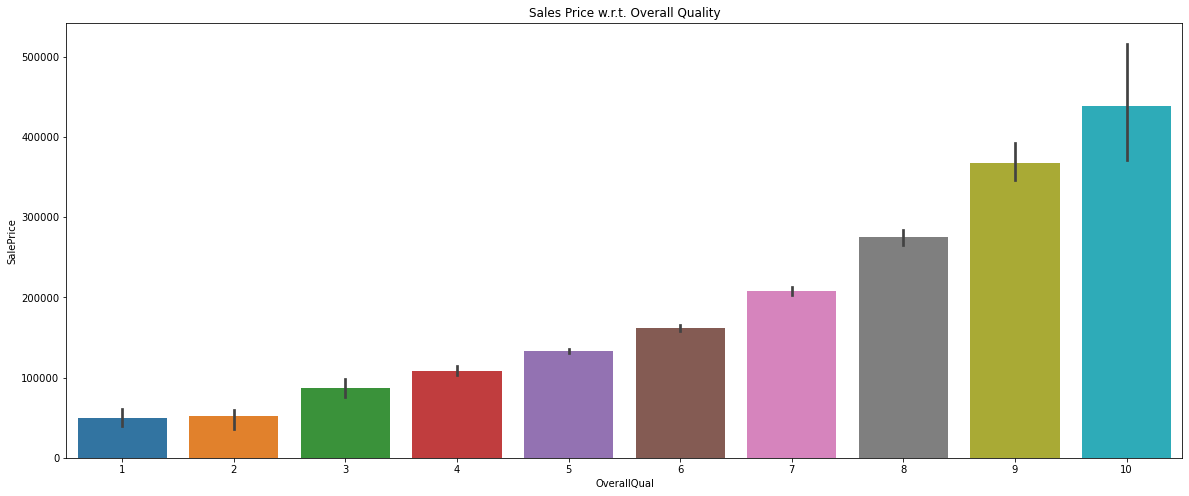

In [16]:
plt.rcParams['figure.figsize'] = (20,8)
sns.barplot(x='OverallQual',y='SalePrice',data=num_data)
plt.title('Sales Price w.r.t. Overall Quality')
plt.show()

**Interpretation: As the Overall Quality of the house increases the Sales Price increases, which is quite obvious.**

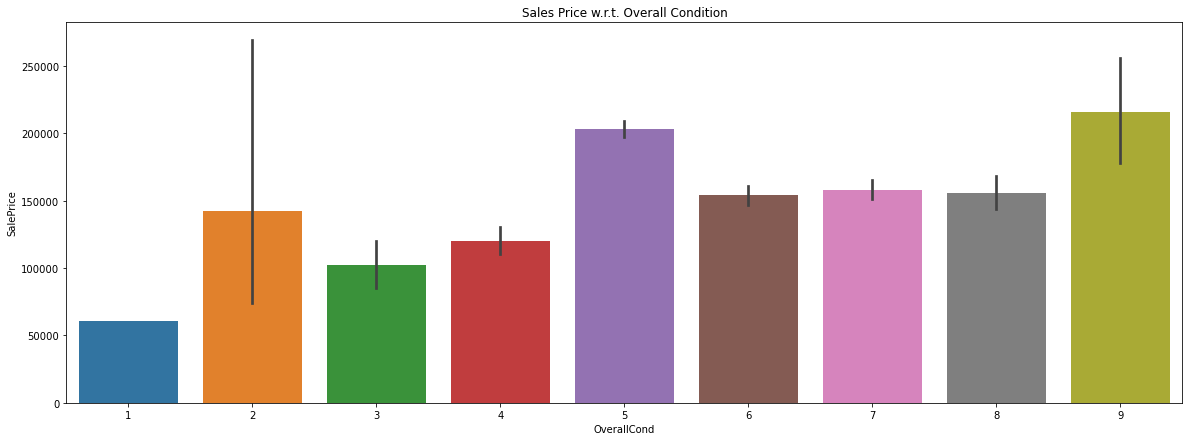

In [17]:
plt.rcParams['figure.figsize'] = (20,7)
sns.barplot(x='OverallCond',y='SalePrice',data=num_data)
plt.title('Sales Price w.r.t. Overall Condition')
plt.show()

**Interpretation: Here is not the case as in the Overall Quality, which is quite evident for condition type 2,6,7,8.**

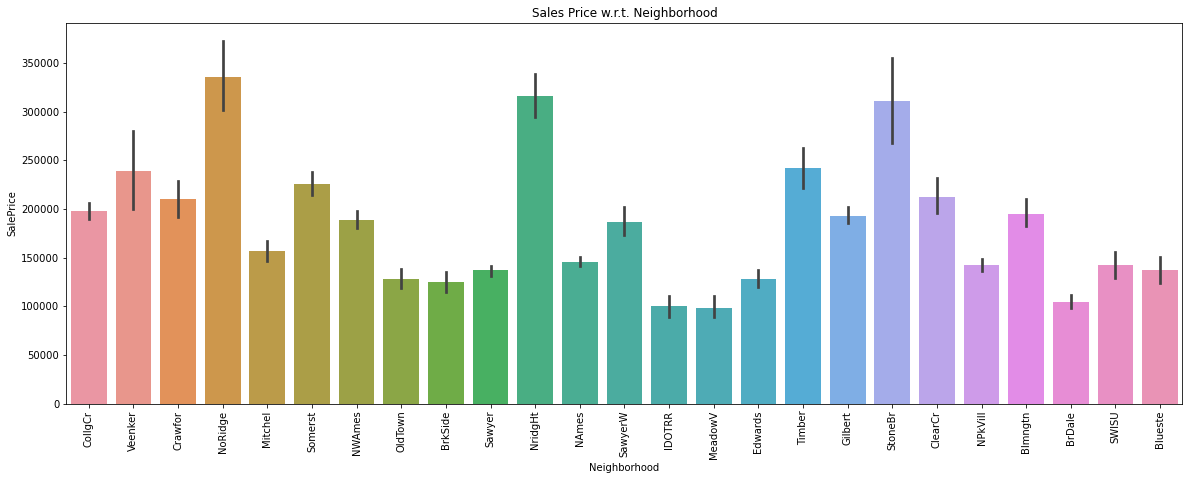

In [18]:
plt.rcParams['figure.figsize'] = (20,7)
sns.barplot(x='Neighborhood',y='SalePrice',data=df1)
plt.title('Sales Price w.r.t. Neighborhood')
plt.xticks(rotation=90)
plt.show()

**Interpretation: Some of the neighborhood properties are highly priced.**

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

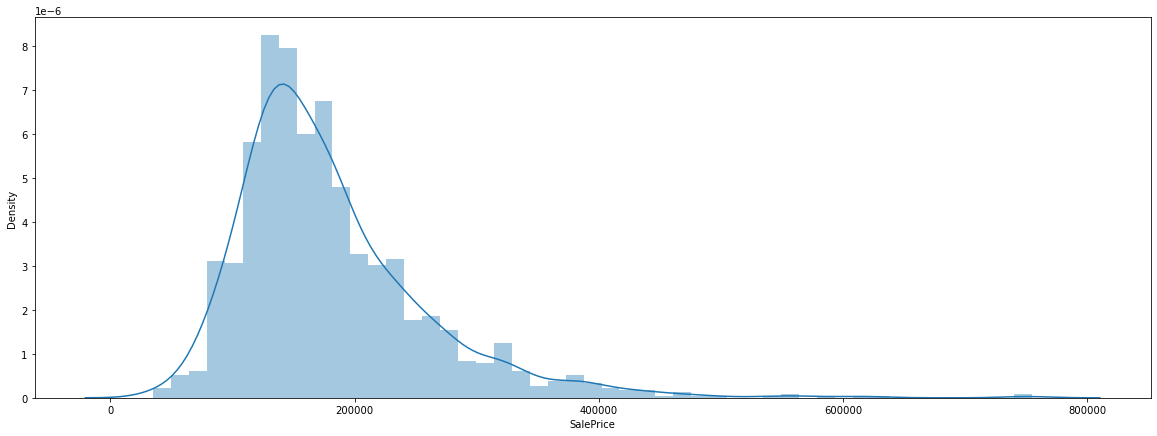

In [19]:
sns.distplot(df1['SalePrice'])

**As we can see that SalePrice is skewed towards the left so we need to perform log transformation to remove the skewness.**

In [20]:
df1['SalePrice'] = np.log1p(df1['SalePrice'])

In [21]:
num_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


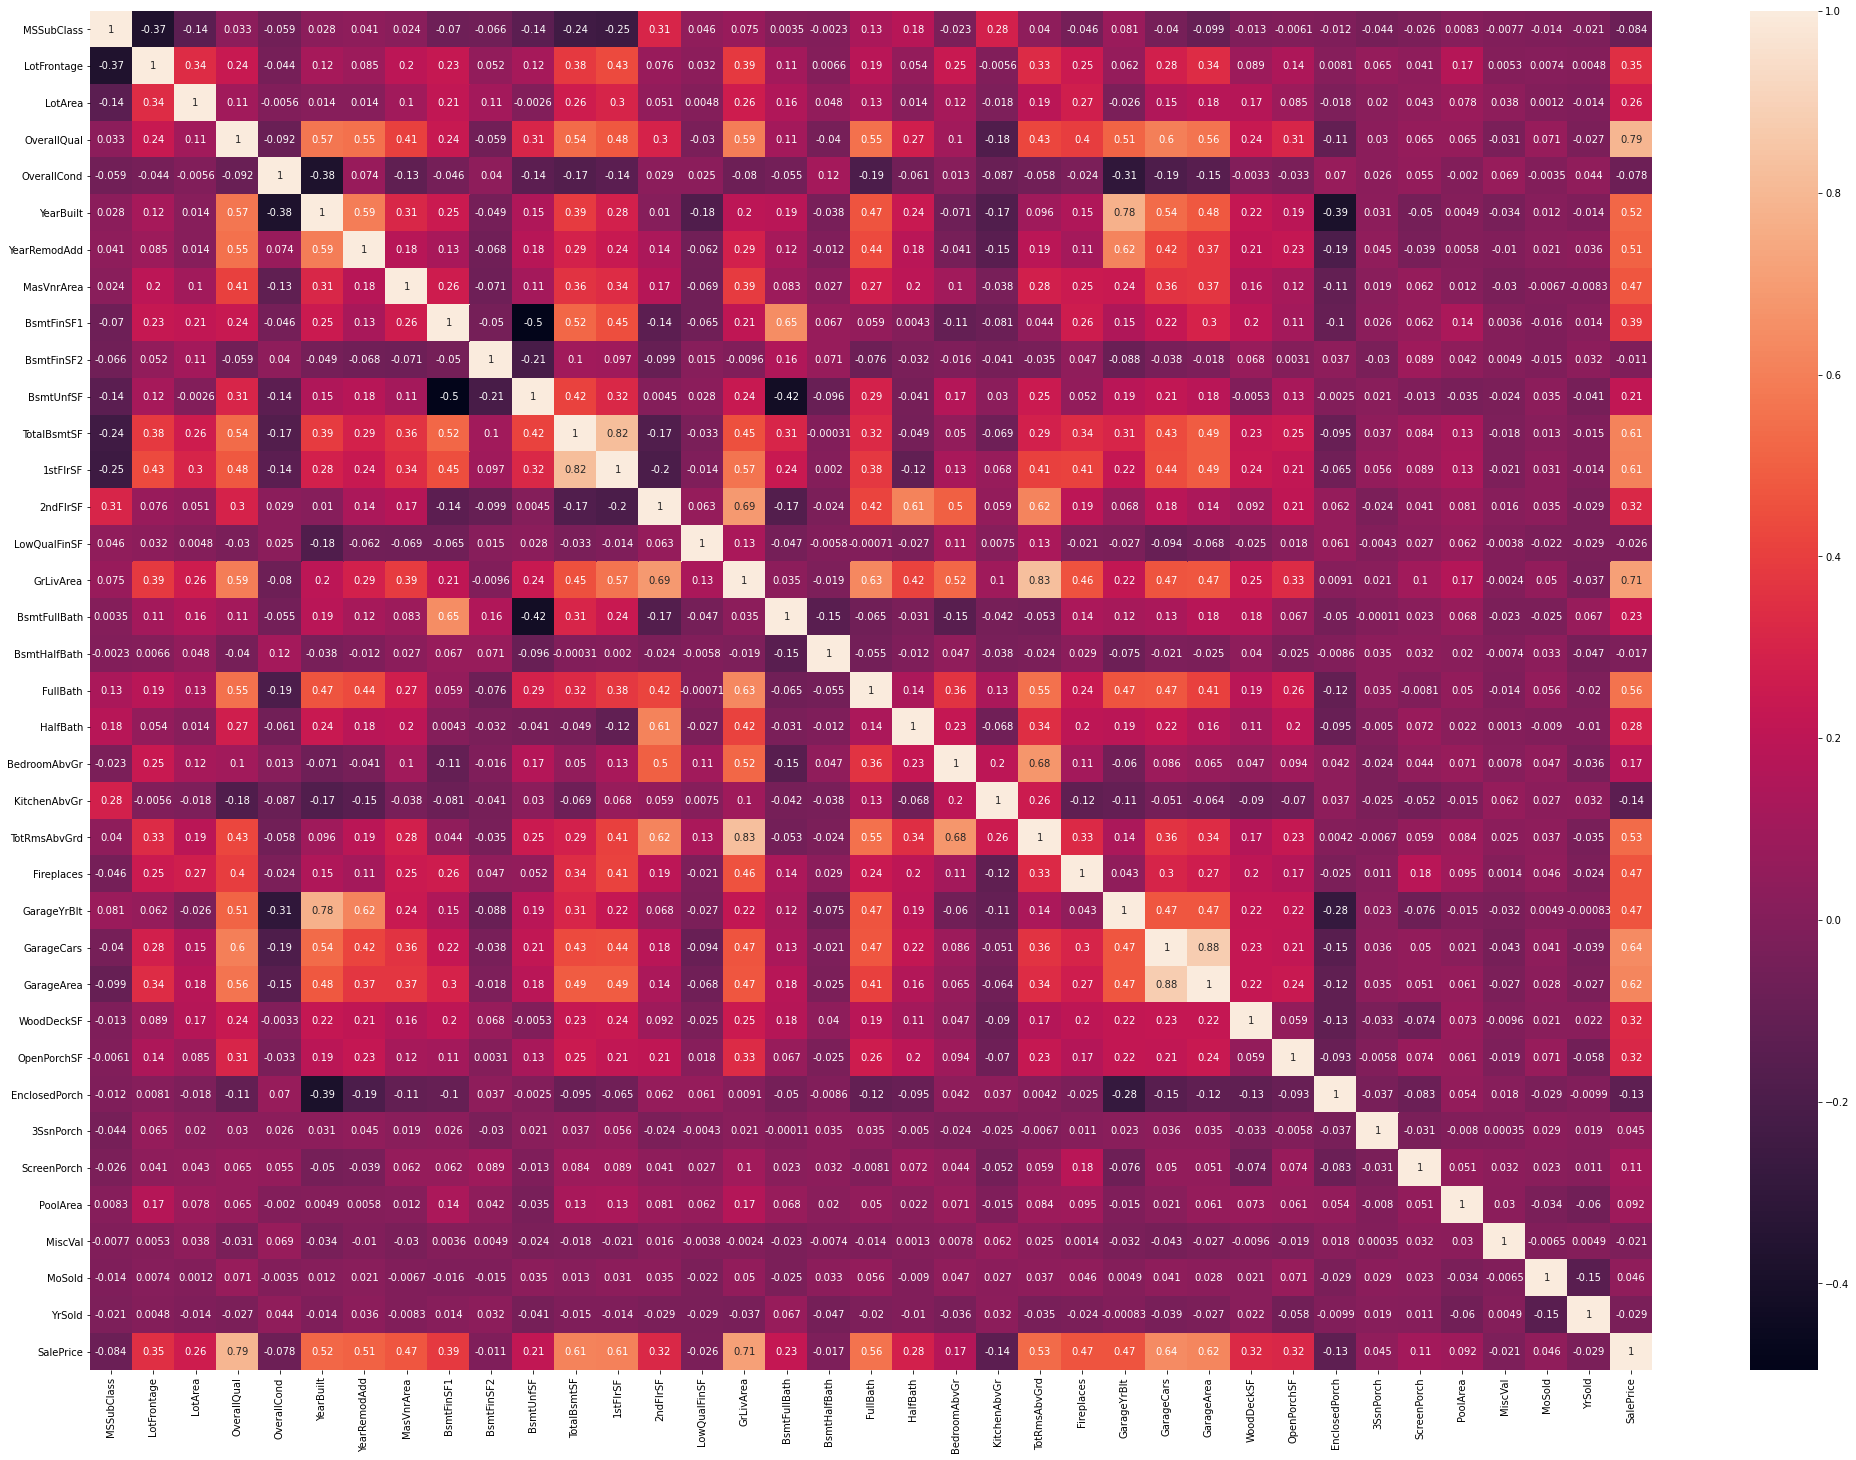

In [22]:
plt.rcParams['figure.figsize'] = (35,25)
sns.heatmap(num_data.corr(), annot=True)
plt.show()

**Some of the variables are correlated. So we need to drop those columns. But also need to check their predictive power before dropping the correlated columns.**

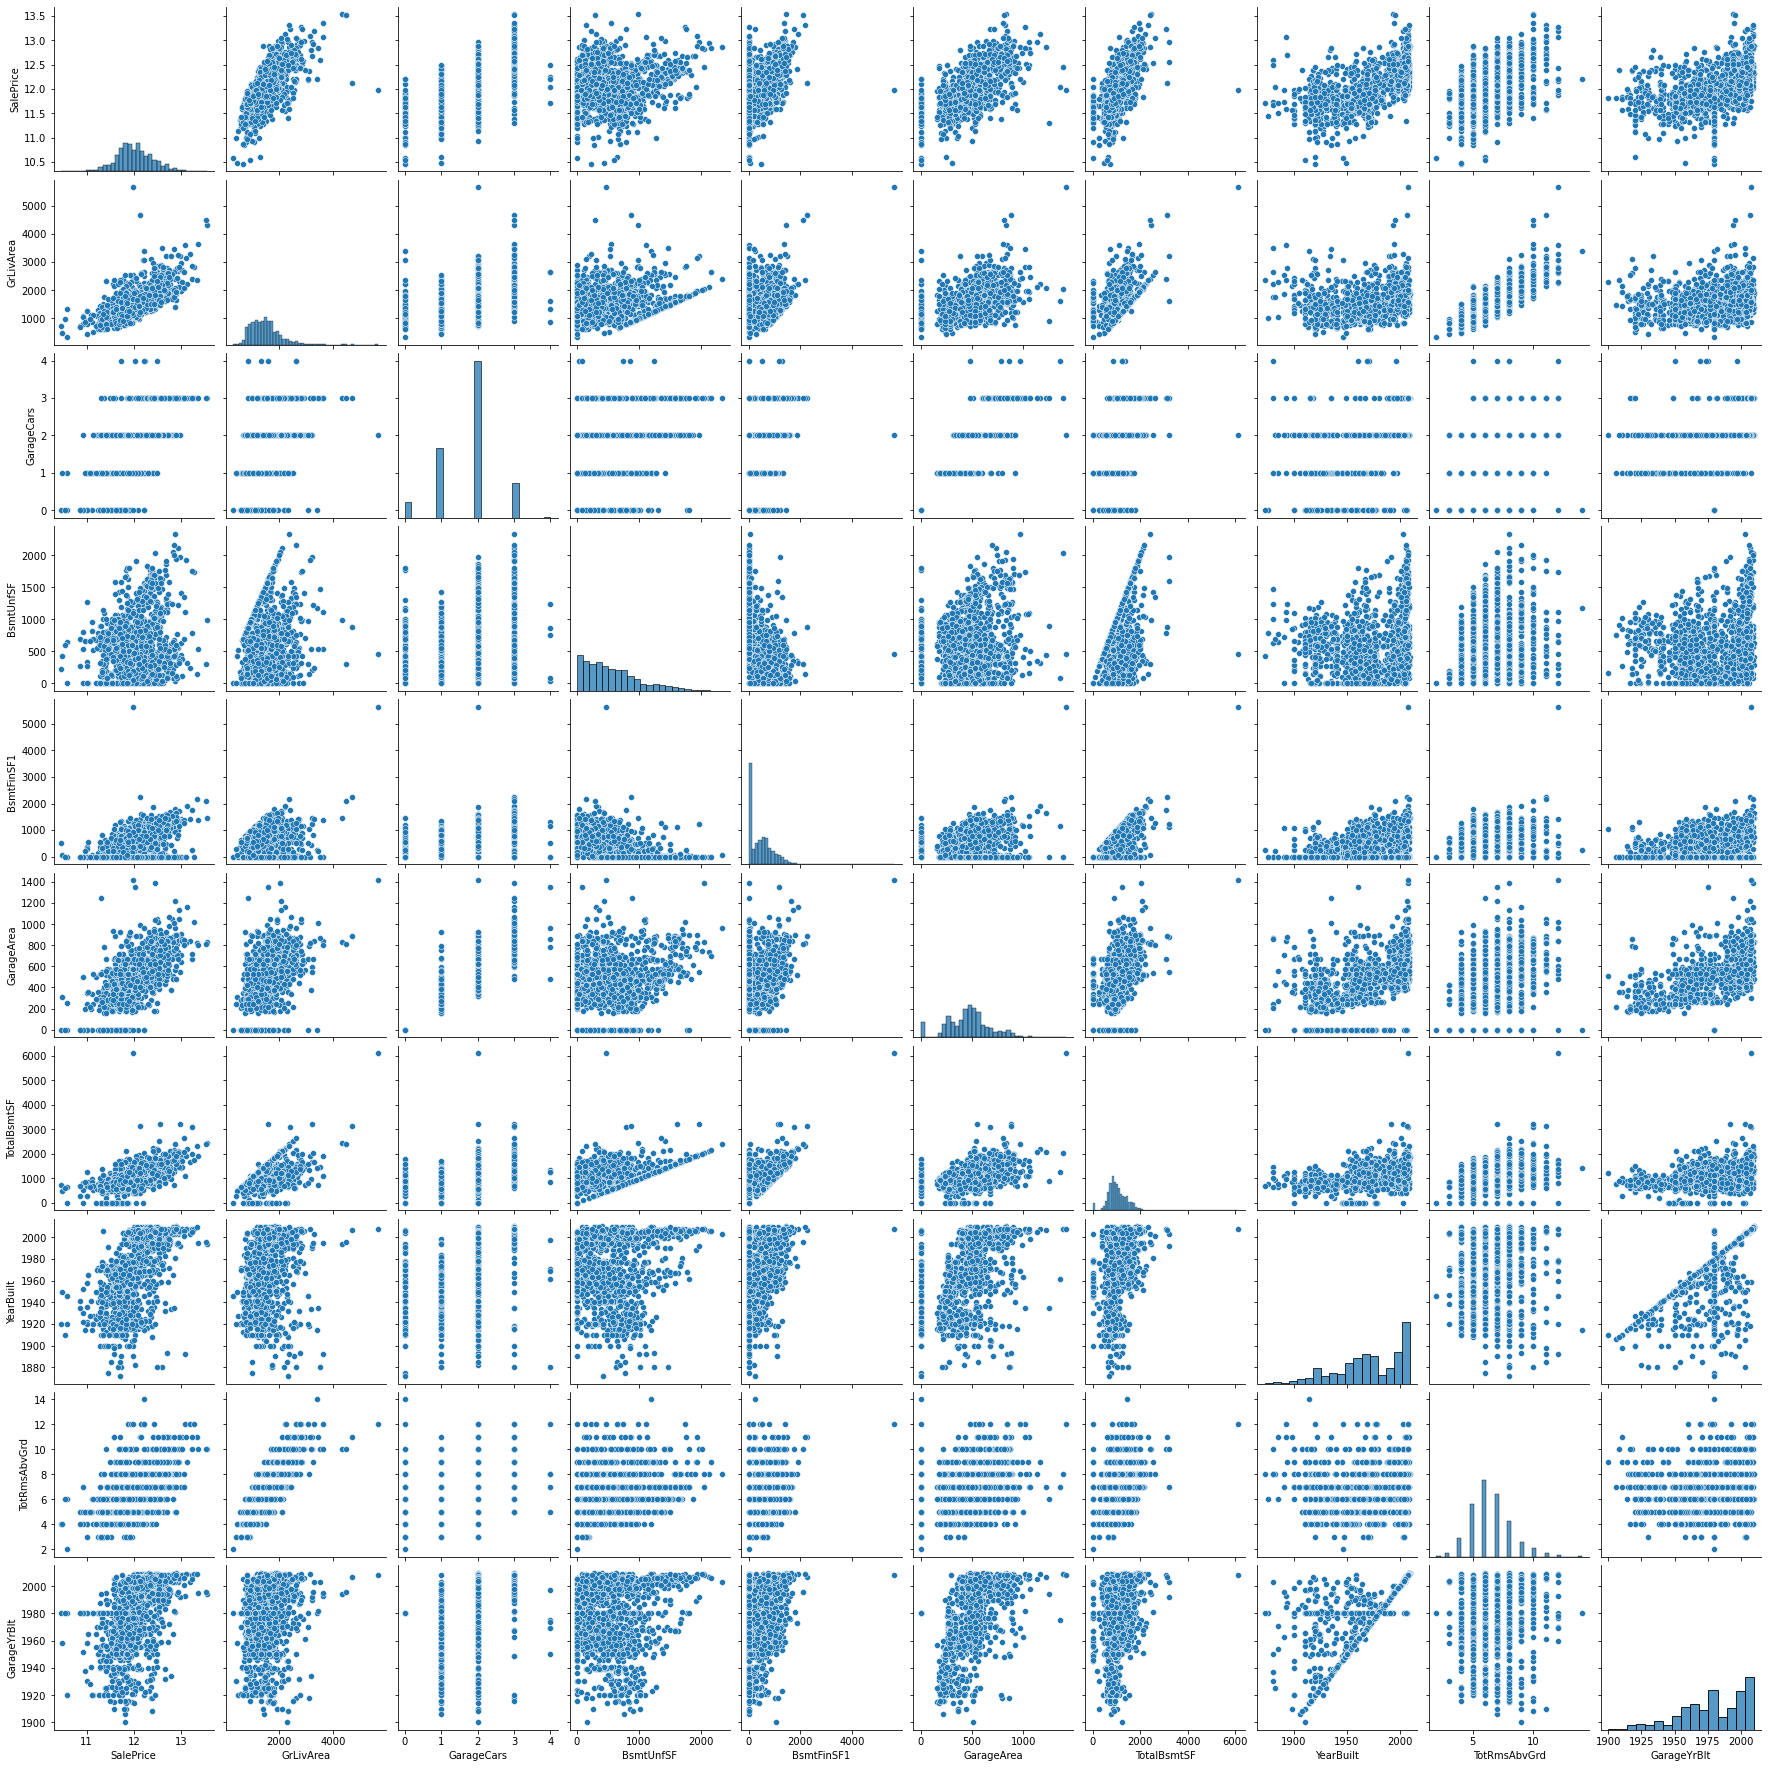

In [23]:
# Checking the same with a pairplot 
col = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt',
        'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df1[col], size = 2.5)
plt.show()

In [24]:
# Dropping columns which are correlated and not contributing to the 'Saleforce'
df1 = df1.drop(['GarageCars'],axis=1)
df1 = df1.drop(['BsmtUnfSF'], axis = 1)
df1 = df1.drop(['TotRmsAbvGrd'], axis = 1)
df1 = df1.drop(['GarageYrBlt'],axis=1)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [25]:
df1.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,1542,2073,0,0,2073,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,1152,1188,1152,0,2340,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,1078,1078,0,0,1078,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,11.864469


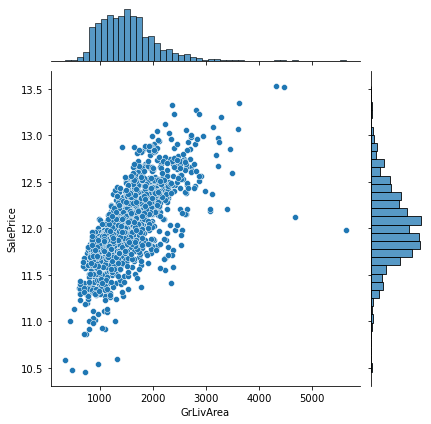

In [26]:
#Analysing numerical columns
sns.jointplot(x='GrLivArea',y='SalePrice',data=df1)
plt.show()

In [27]:
#removing some outliers
q1 = df1['GrLivArea'].quantile(0.25)
q3 = df1['GrLivArea'].quantile(0.75)
diff = q3 - q1
lower = q1 - 1.5*diff
upper = q3 + 1.5*diff
df1 = df1[(df1['GrLivArea']<upper) & (df1['GrLivArea']>lower)]

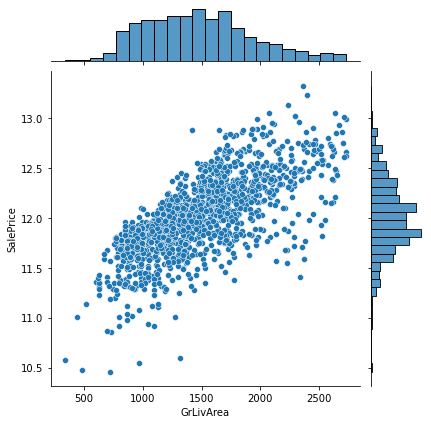

In [28]:
#Again plotting after removing some outliers
sns.jointplot(x=df1['GrLivArea'],y=df1['SalePrice'])
plt.show()

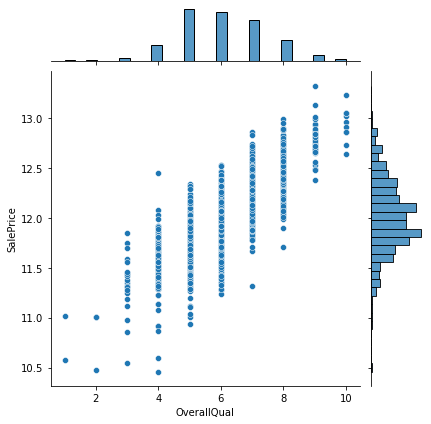

In [29]:
sns.jointplot(x=df1['OverallQual'], y=df1['SalePrice']) #boxplot
plt.show()

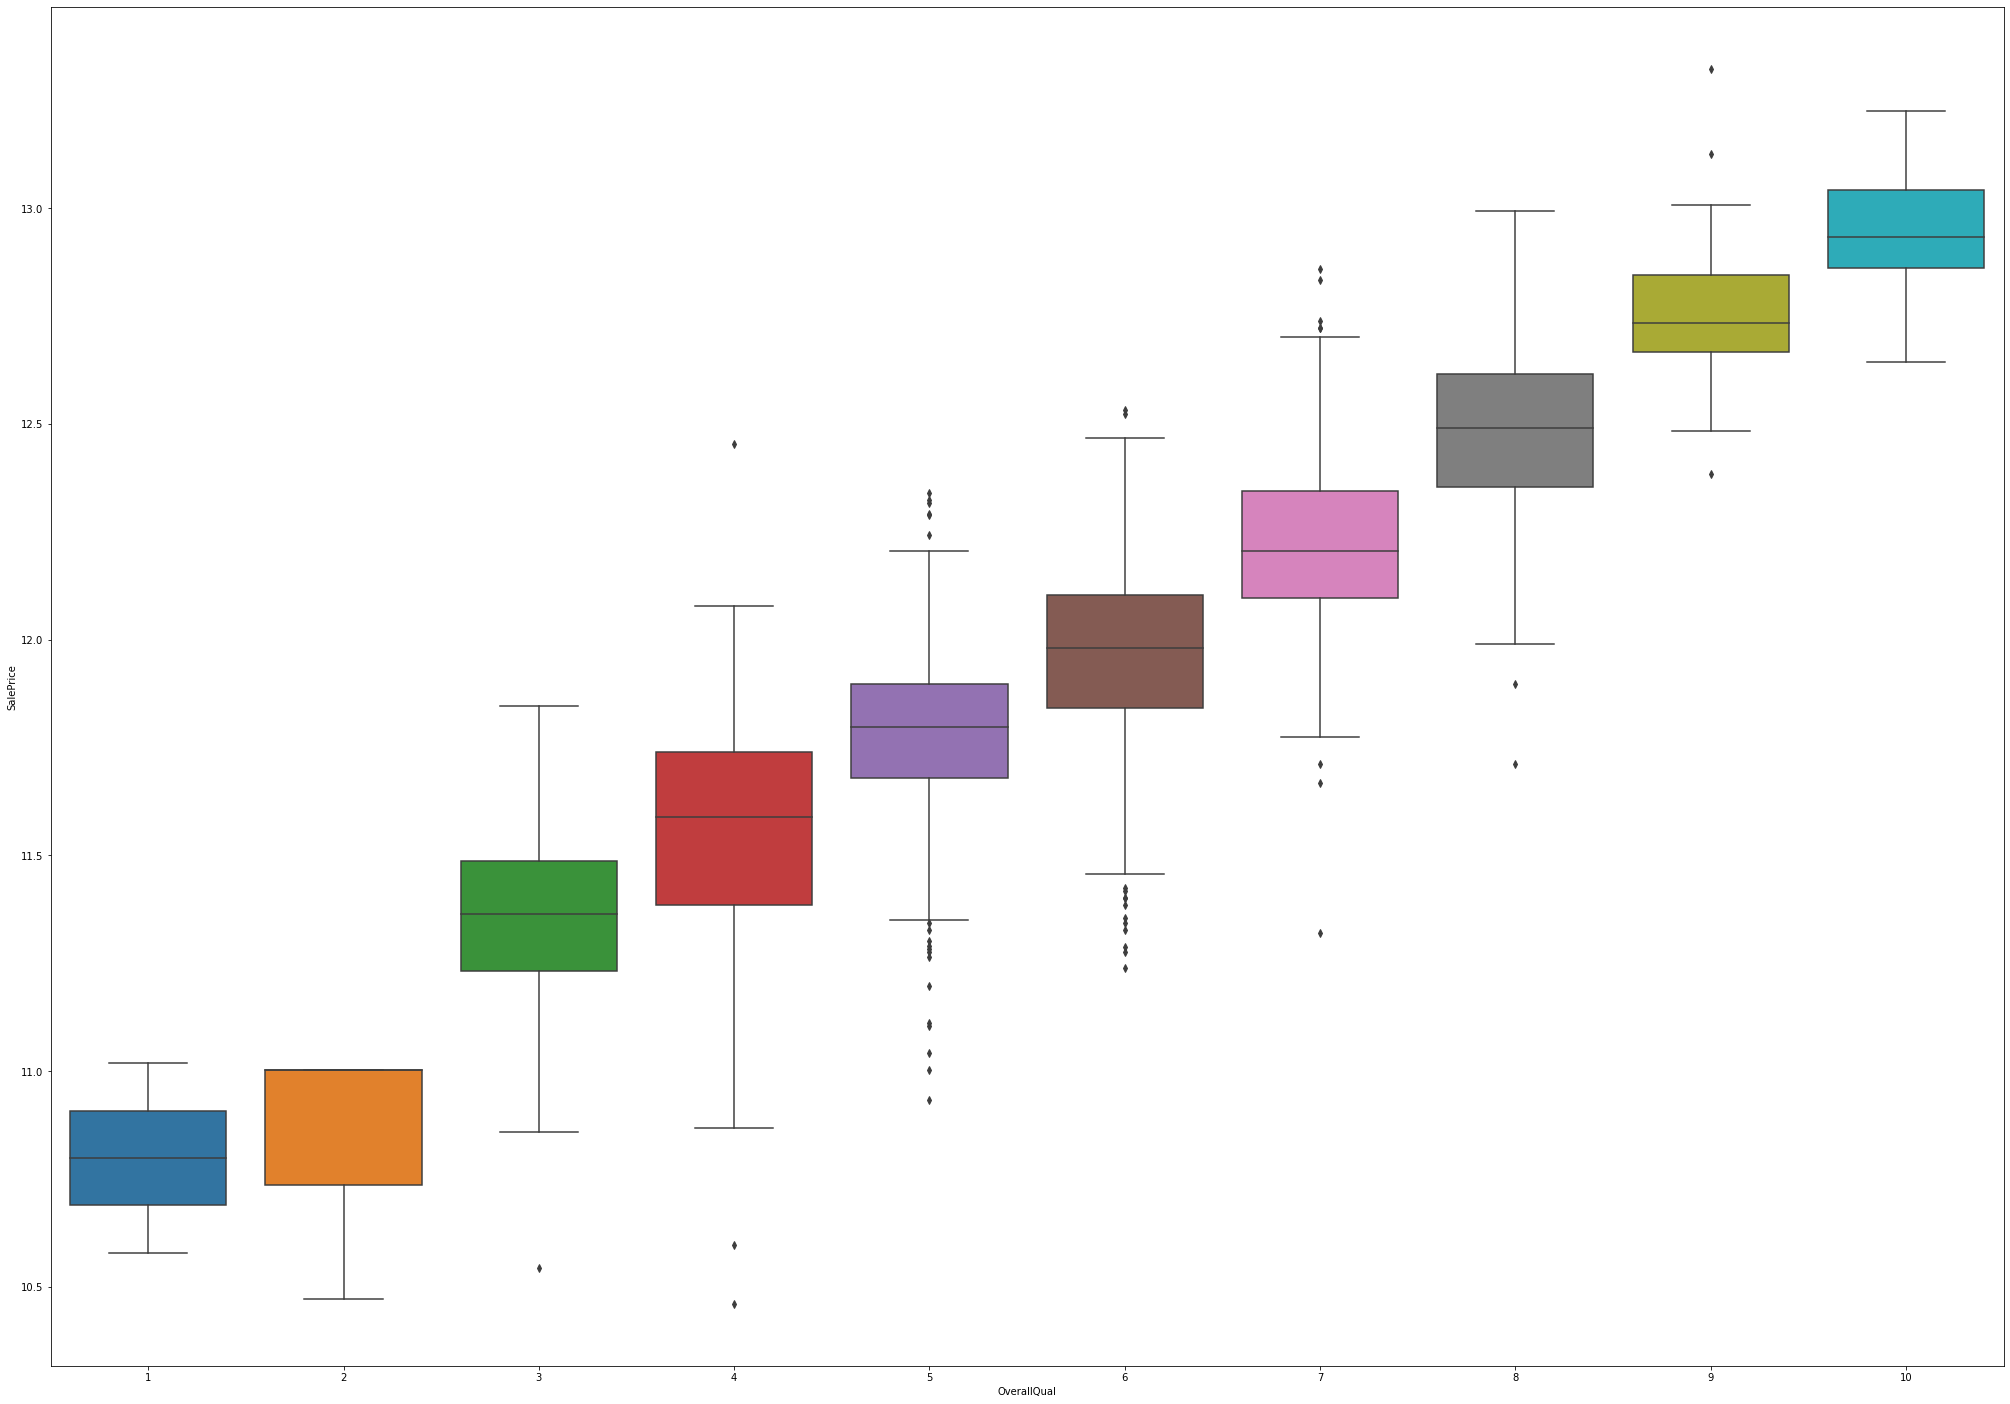

In [30]:
sns.boxplot(x=df1['OverallQual'], y=df1['SalePrice']) #boxplot
plt.show()

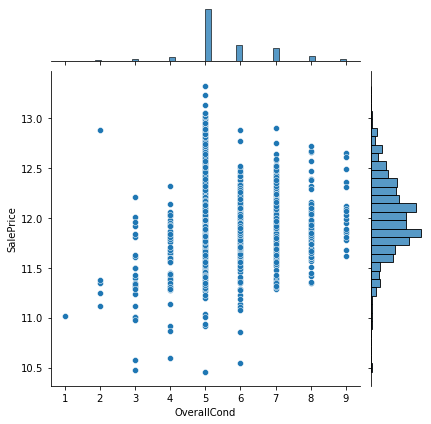

In [31]:
sns.jointplot(x=df1['OverallCond'],y=df1['SalePrice'])
plt.show()

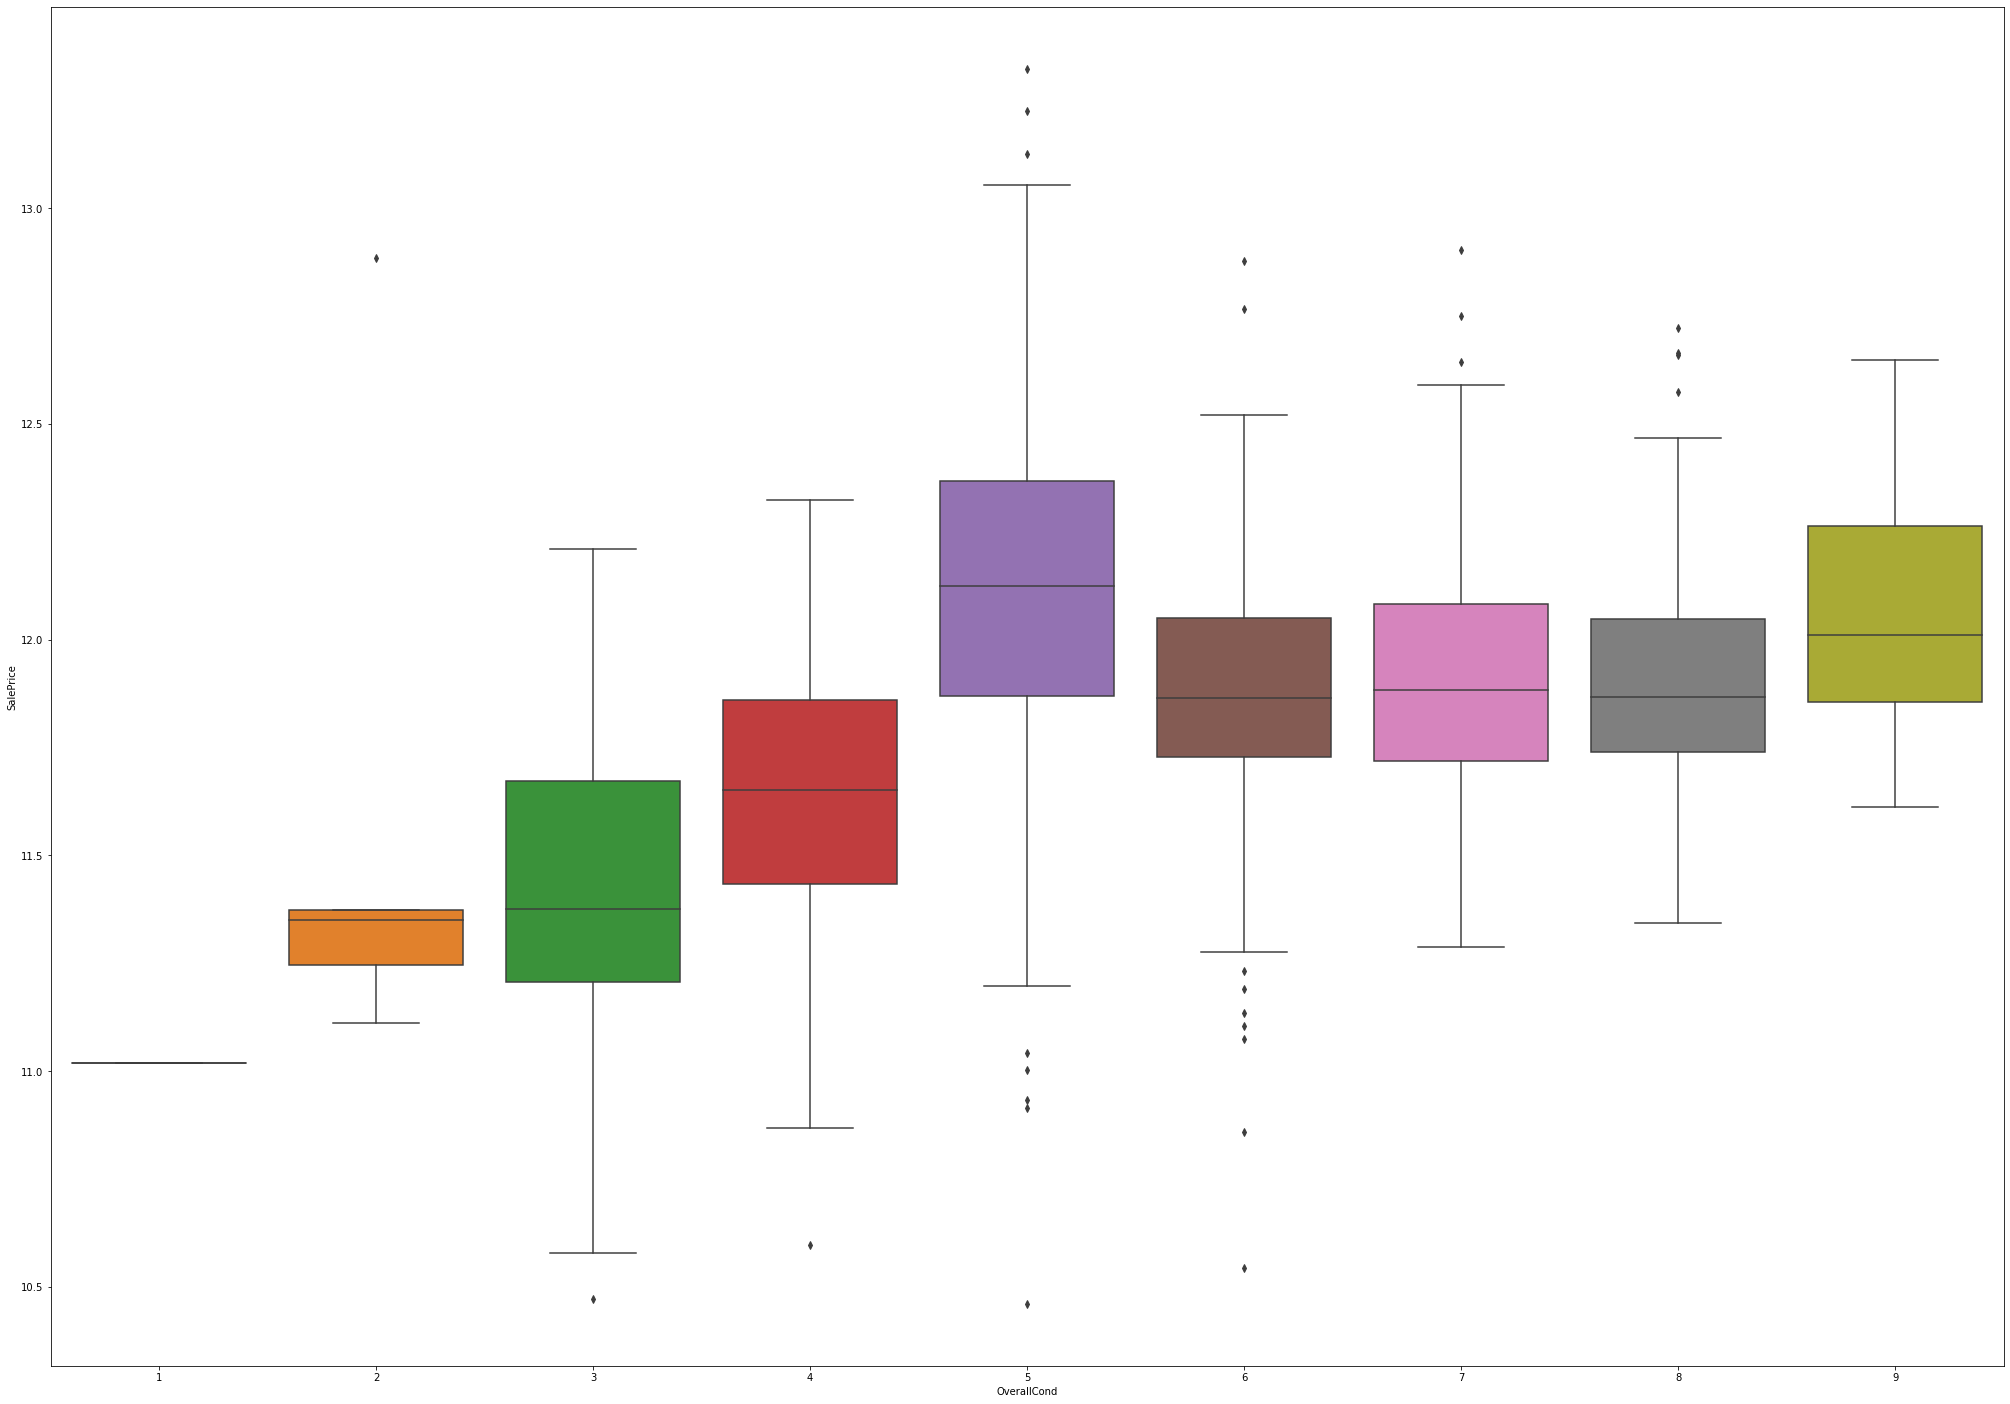

In [32]:
sns.boxplot(x=df1['OverallCond'],y=df1['SalePrice'])
plt.show()

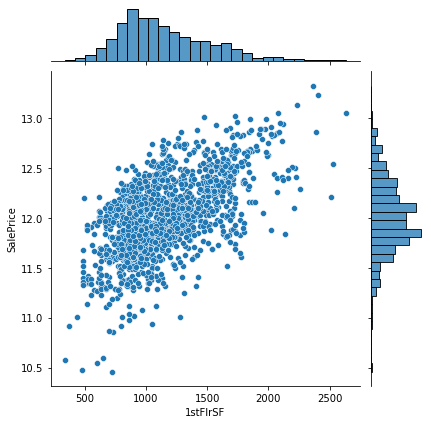

In [33]:
sns.jointplot(x=df1['1stFlrSF'],y=df1['SalePrice'])
plt.show()

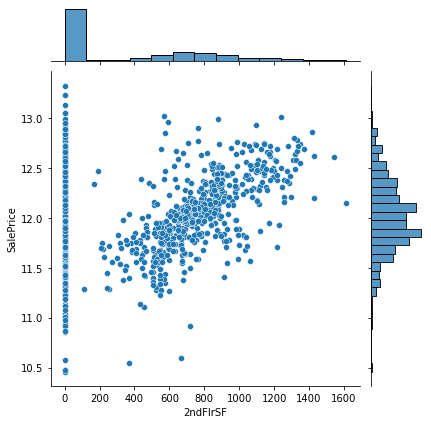

In [34]:
sns.jointplot(x=df1['2ndFlrSF'],y=df1['SalePrice'])
plt.show()

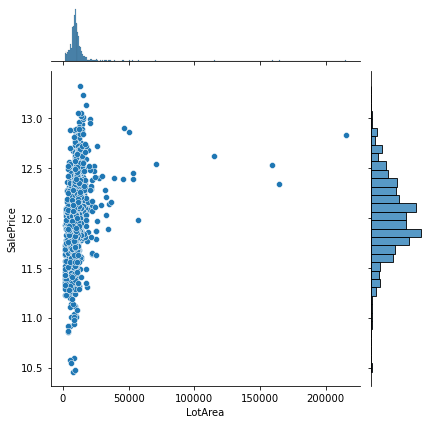

In [35]:
sns.jointplot(x=df1['LotArea'],y=df1['SalePrice'])
plt.show()

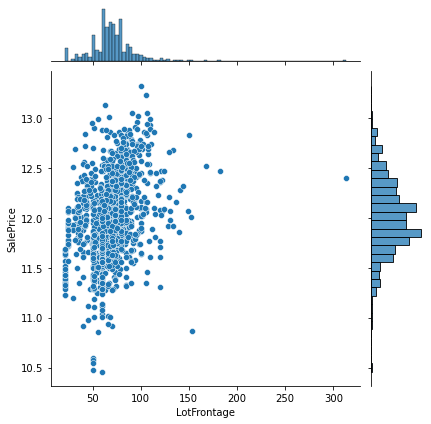

In [36]:
sns.jointplot(x=df1['LotFrontage'],y=df1['SalePrice'])
plt.show()

### With the help of columns such as 'YearBuilt' and 'YrSold' we calculate the Age of Property 

In [37]:
df1['Property Age'] = df1['YrSold'] - df1['YearBuilt']
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property Age
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429220,8


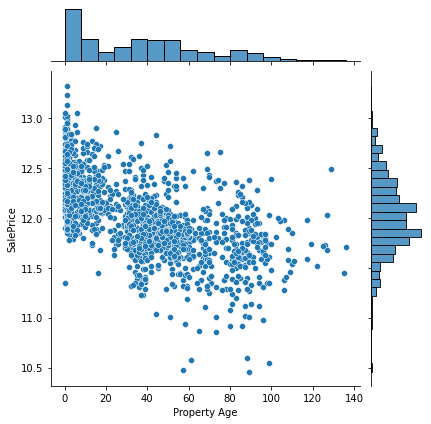

In [38]:
# Now visualizing the property age with the SalePrice
sns.jointplot(x=df1['Property Age'],y=df1['SalePrice'])
plt.show()

**As the age of Property increases the Value is depriciating, which shows newer the property Higher is the SalePrice**

### Dropping the columns such as 'Month Sold' and 'Year Sold', 'Year Built' and 'Year remodelled' as it will be not required further

In [39]:
df1 = df1.drop(['MoSold'], axis=1)
df1 = df1.drop(['YrSold'], axis=1)
df1 = df1.drop(['YearBuilt'], axis=1)
df1 = df1.drop(['YearRemodAdd'], axis=1)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Property Age
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,WD,Normal,12.429220,8


In [40]:
df1['Utilities'].value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [41]:
df1['Street'].value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [42]:
# Since there is low variance in above two columns so we can remove them
df1 = df1.drop(['Street','Utilities'],axis=1)

In [43]:
df2 = df1.select_dtypes(include='number')

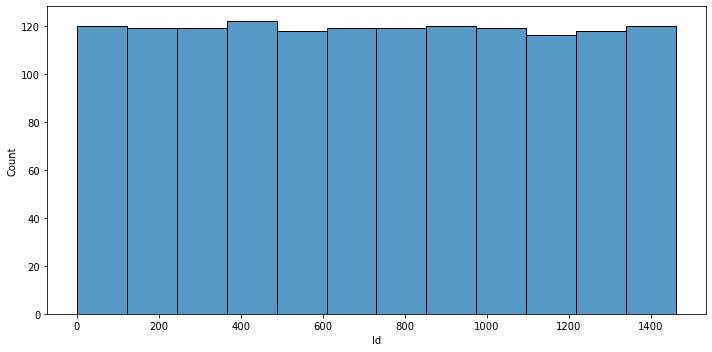

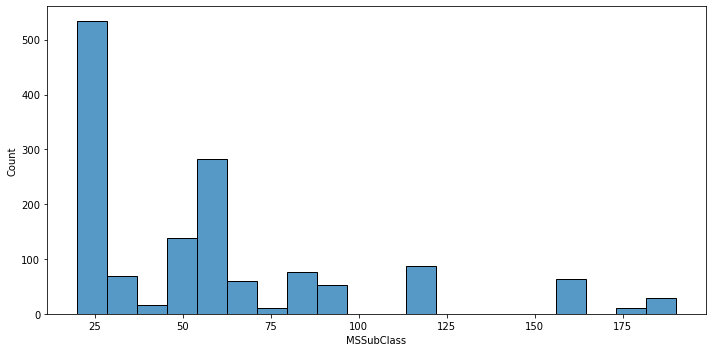

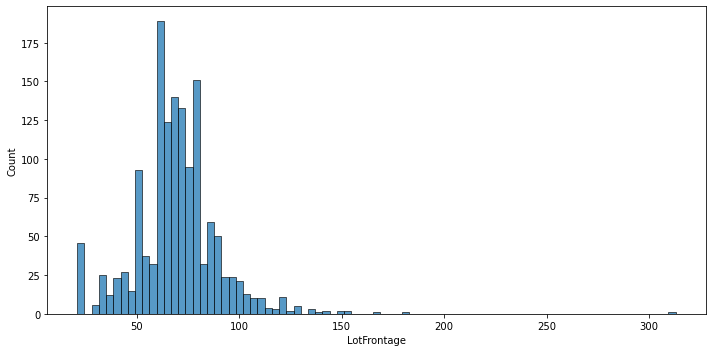

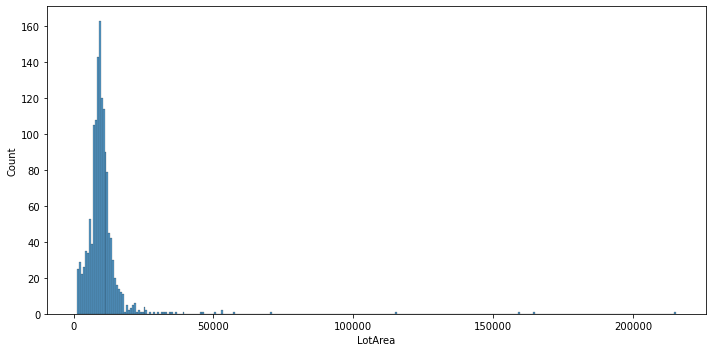

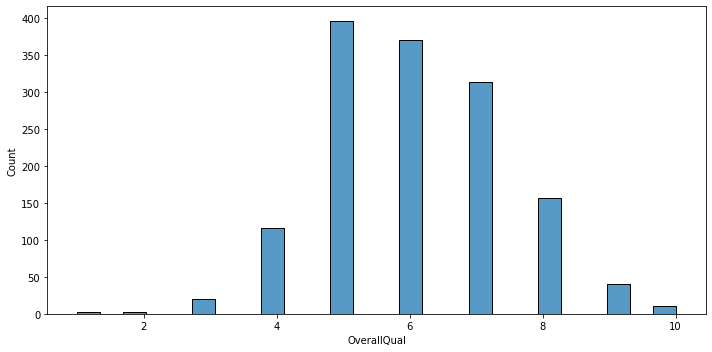

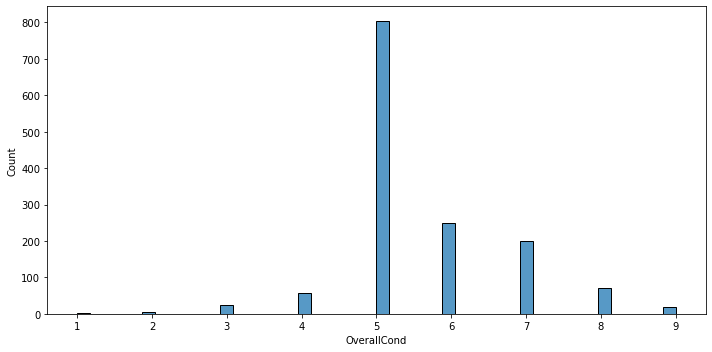

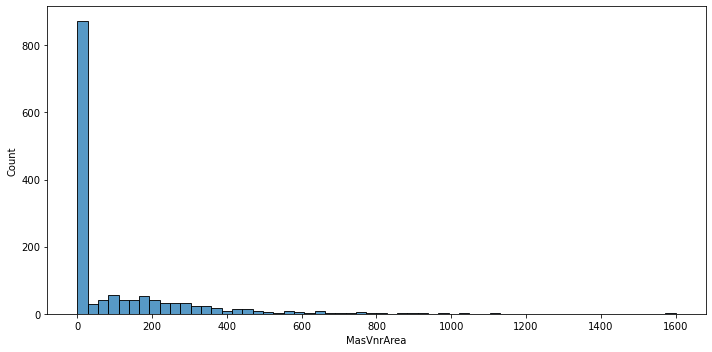

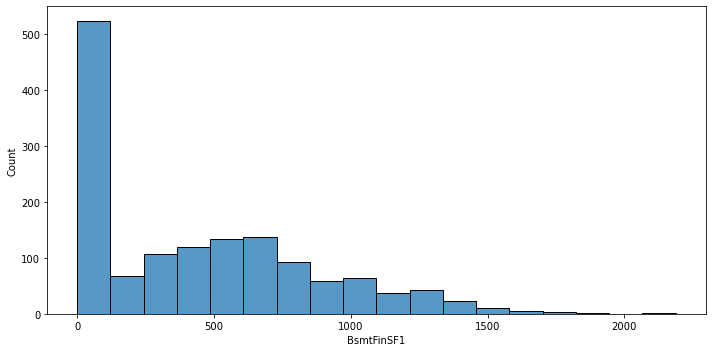

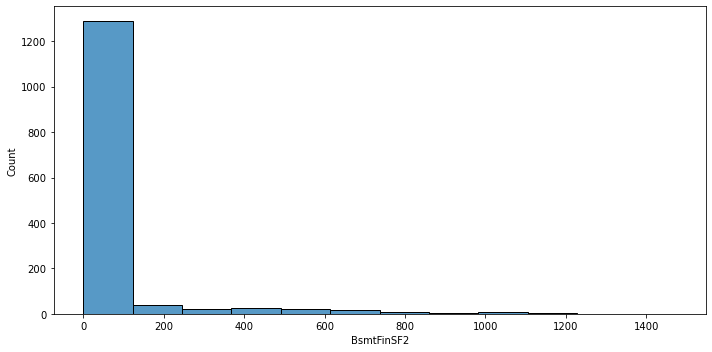

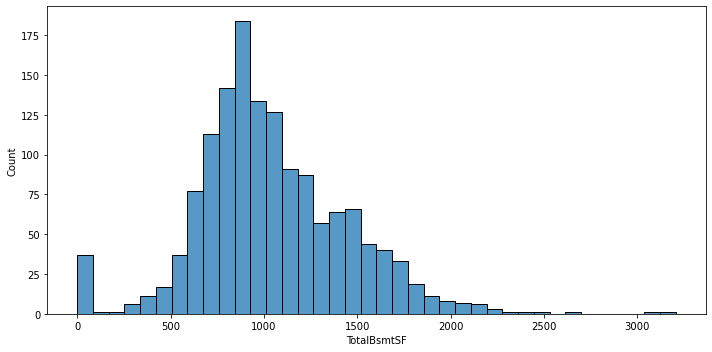

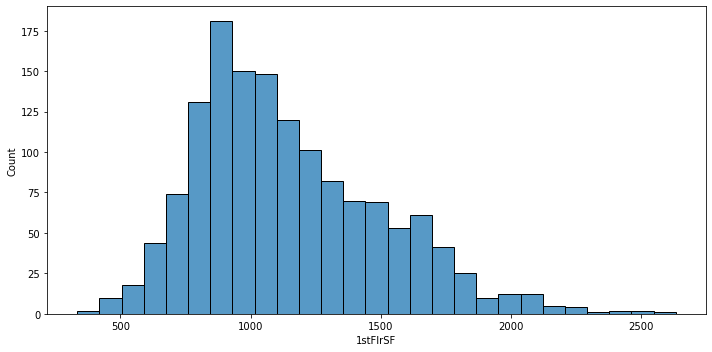

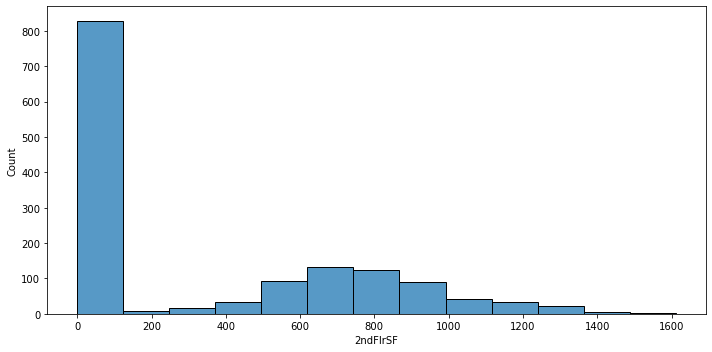

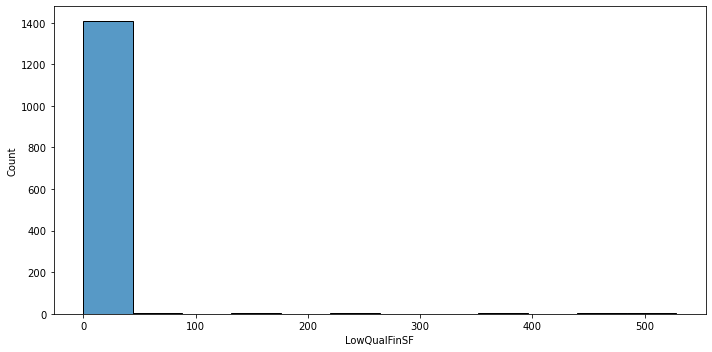

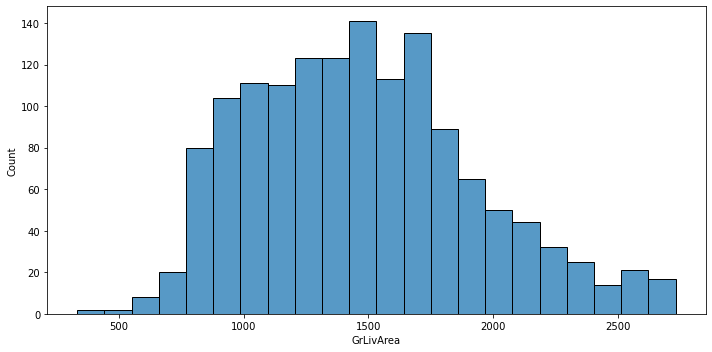

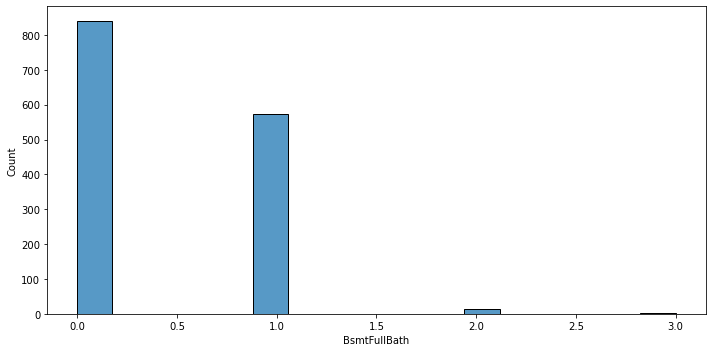

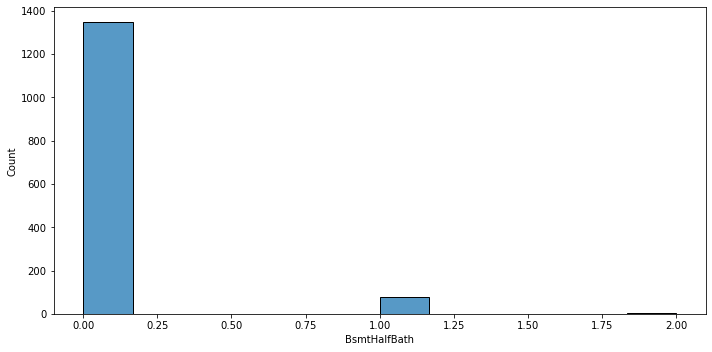

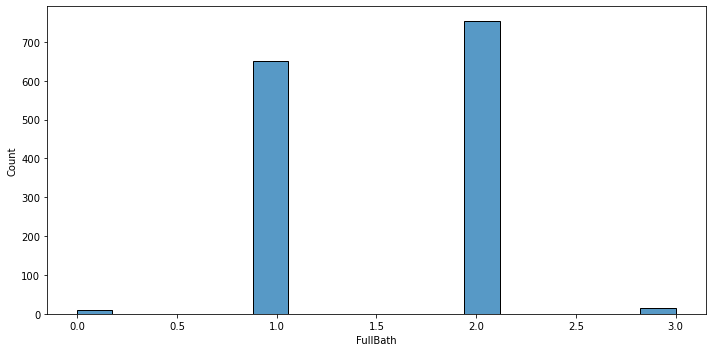

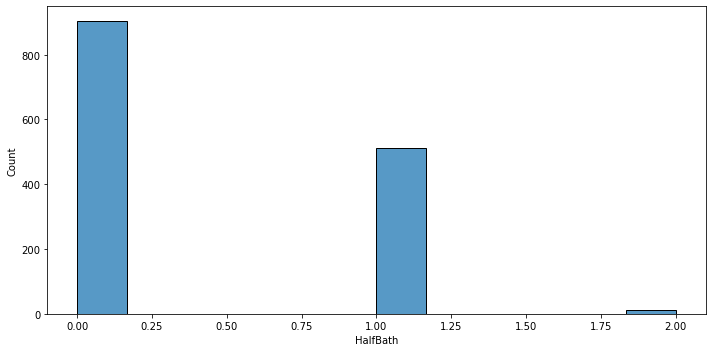

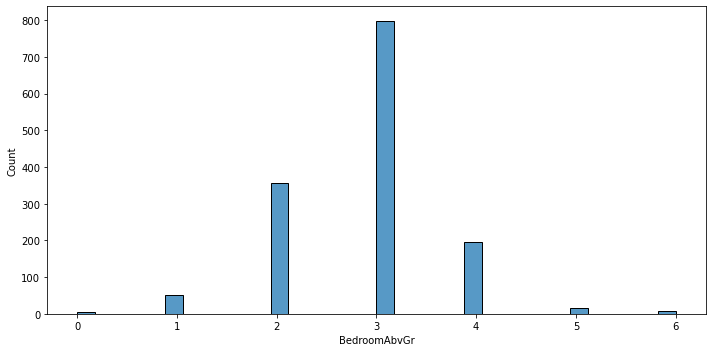

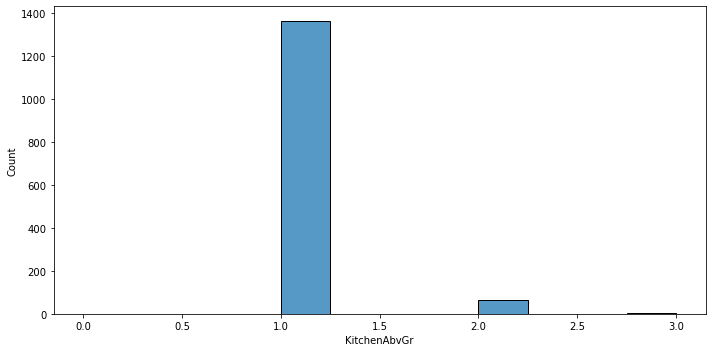

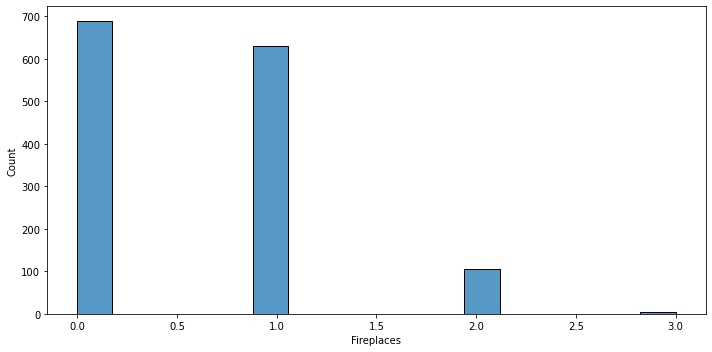

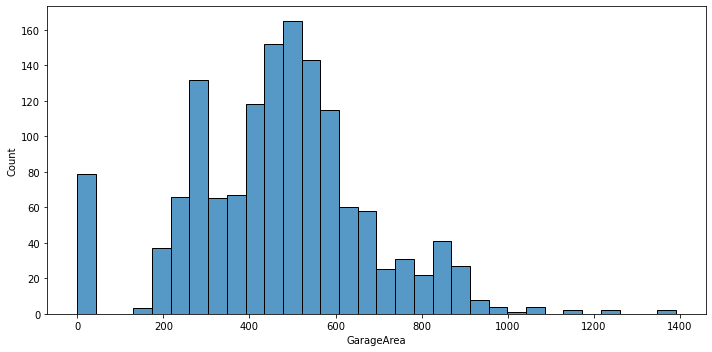

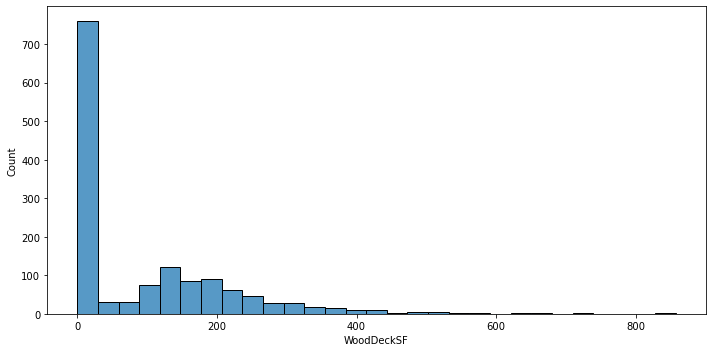

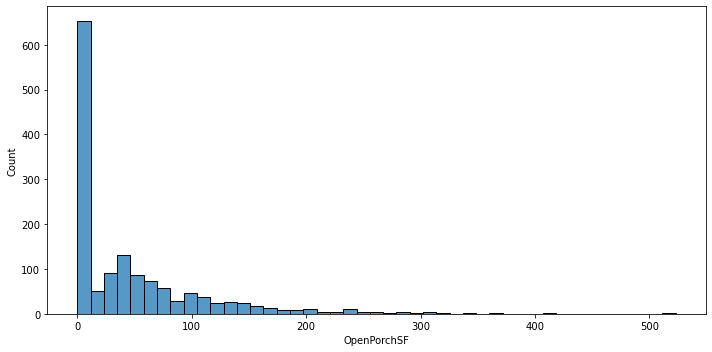

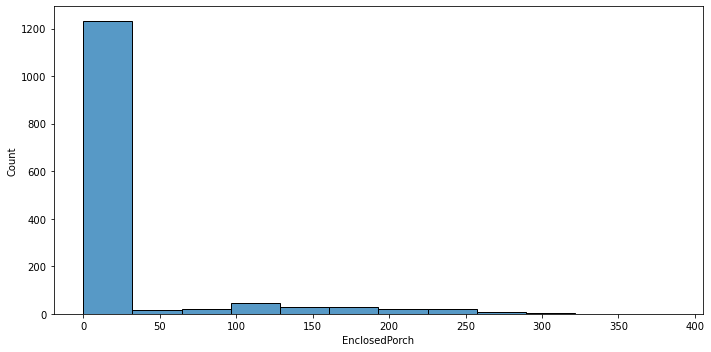

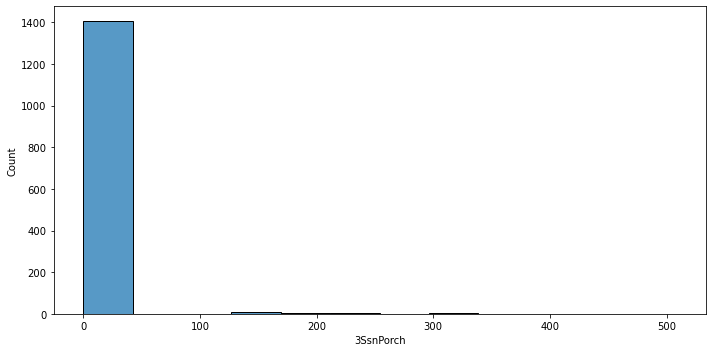

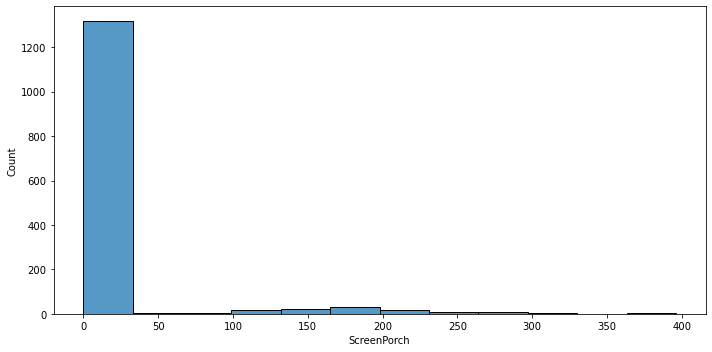

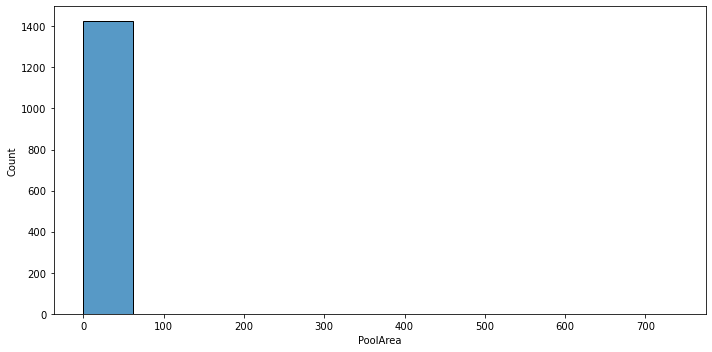

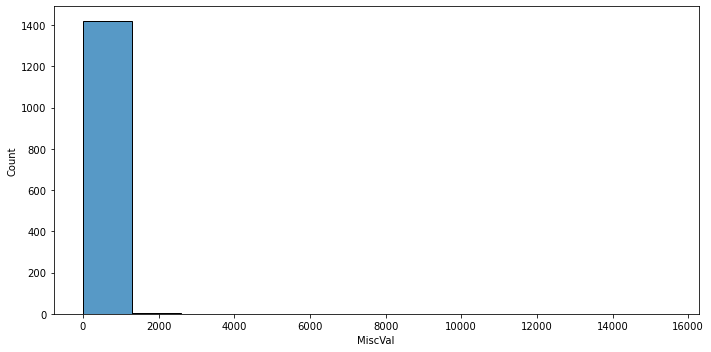

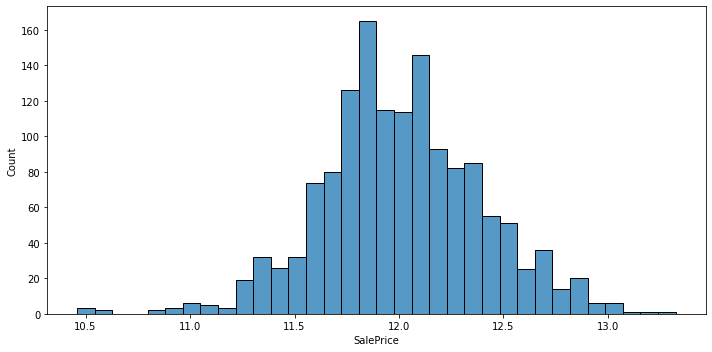

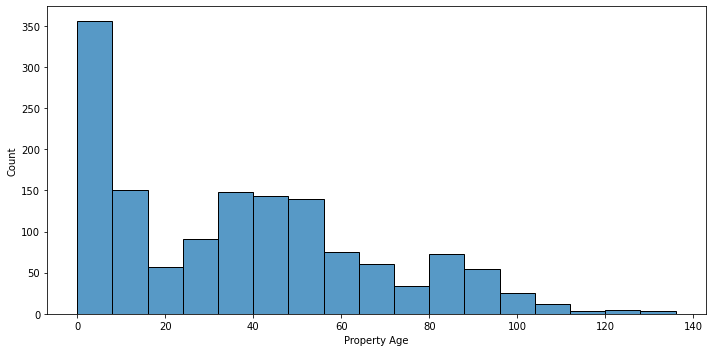

In [44]:
#fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(10, 5))
plt.rcParams['figure.figsize']=(10,5)
for i, col in enumerate(df2.columns):
    sns.histplot(df2[col])
    plt.tight_layout()
    plt.show()

In [45]:
df3 = df1.select_dtypes(include='object')

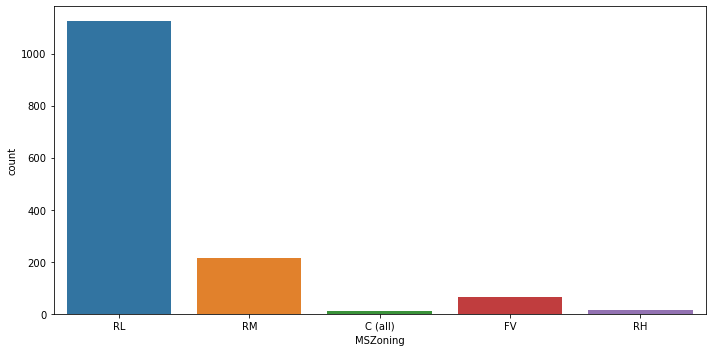

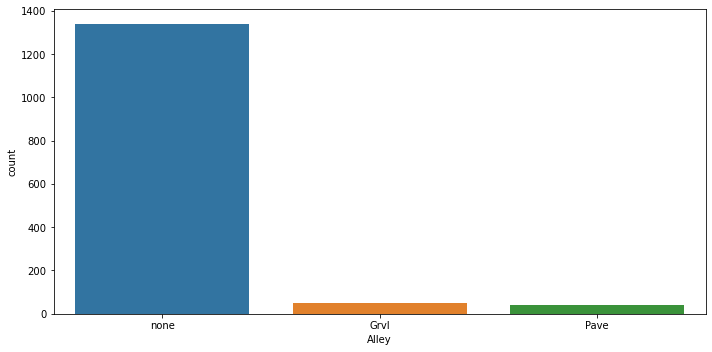

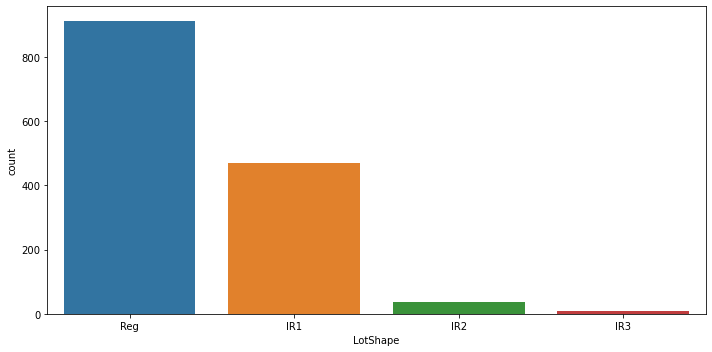

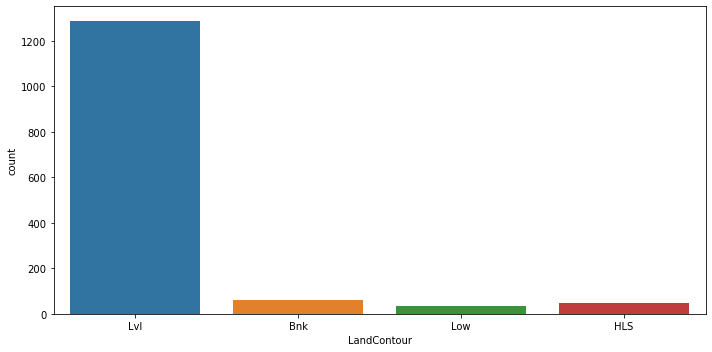

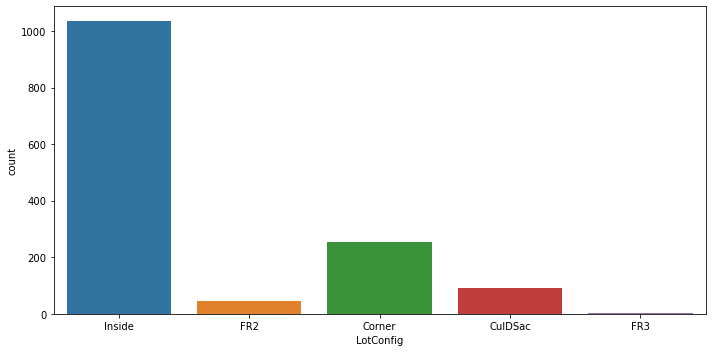

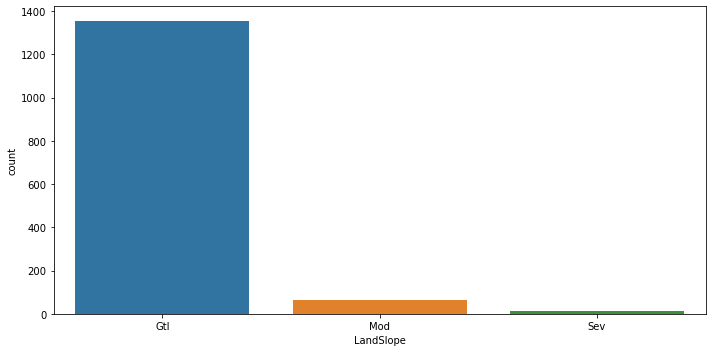

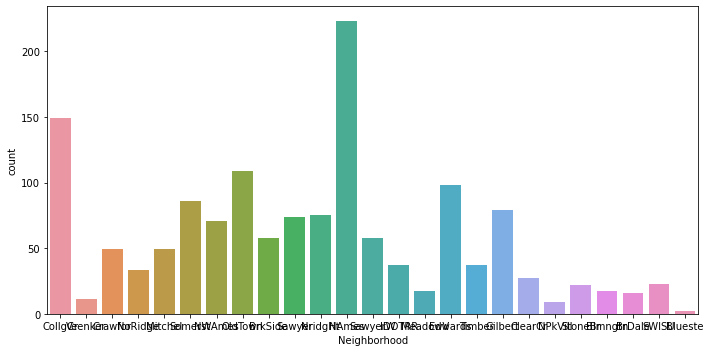

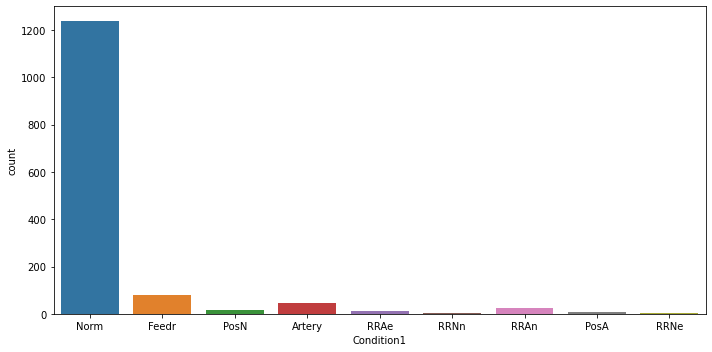

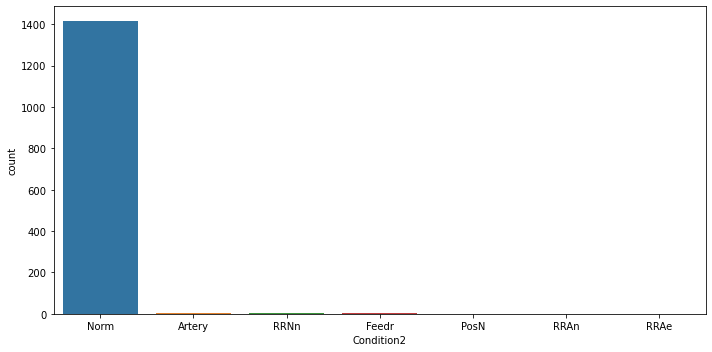

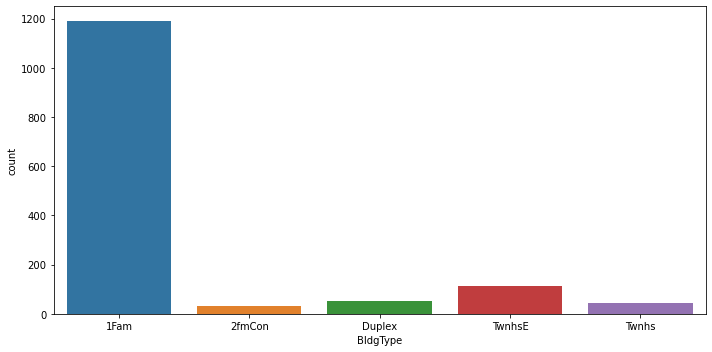

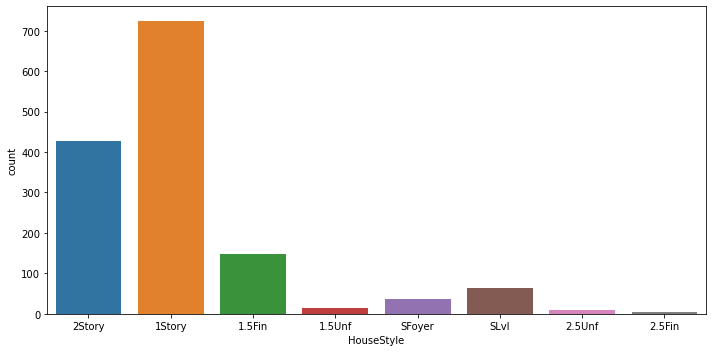

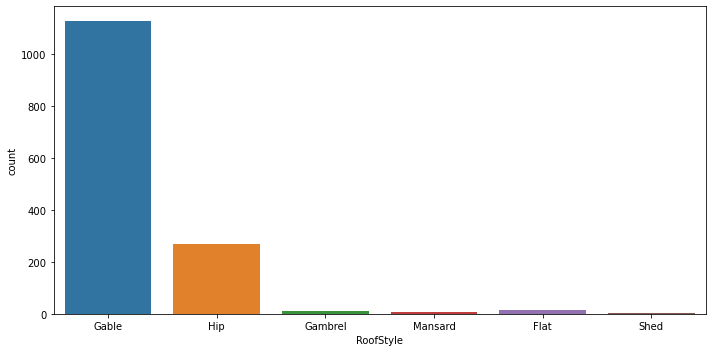

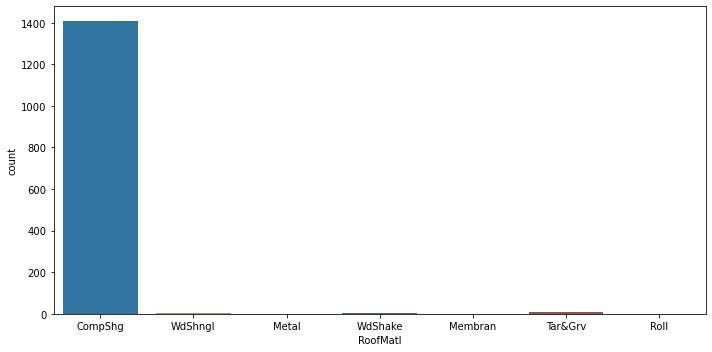

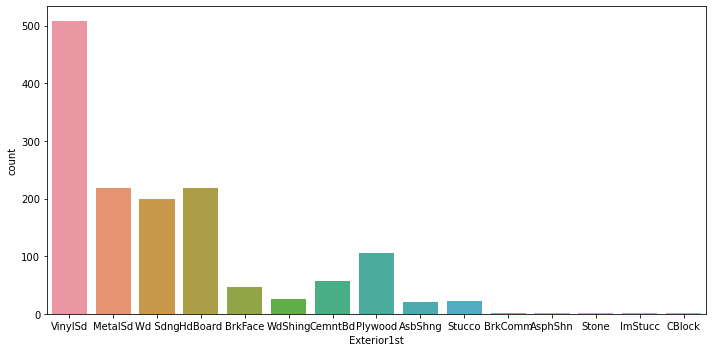

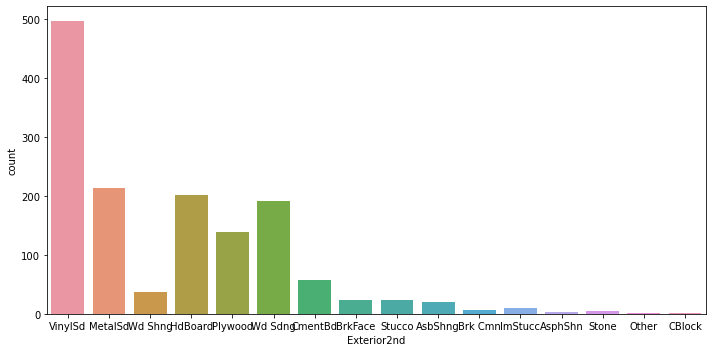

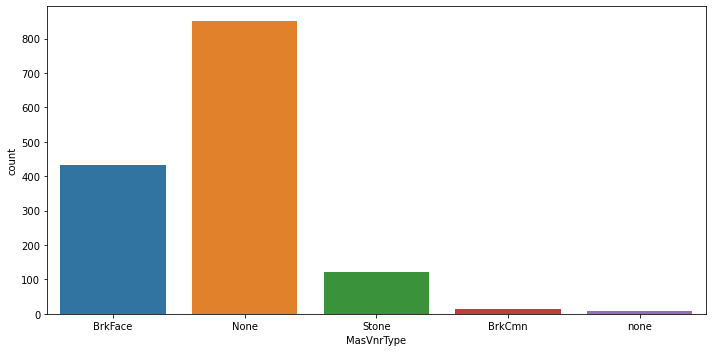

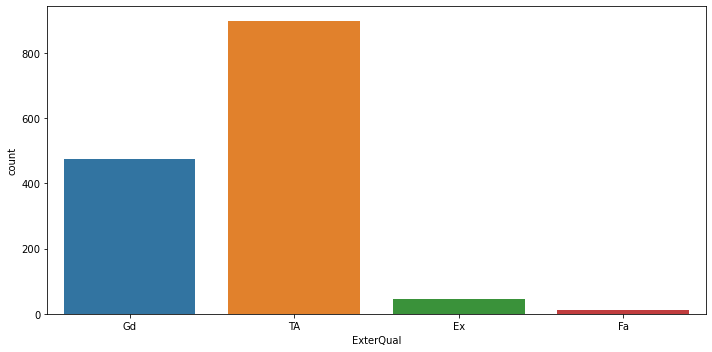

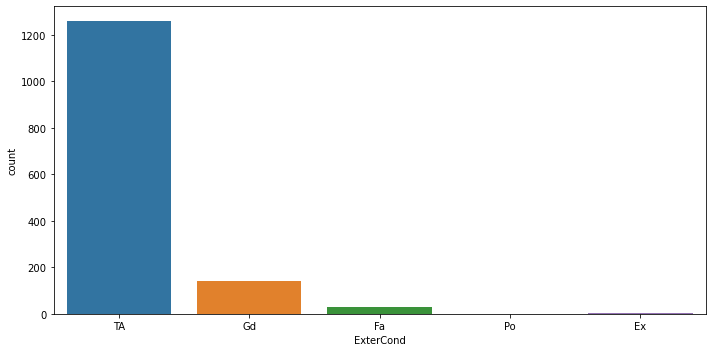

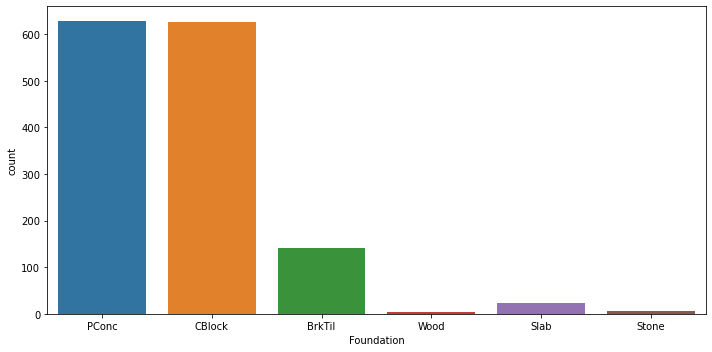

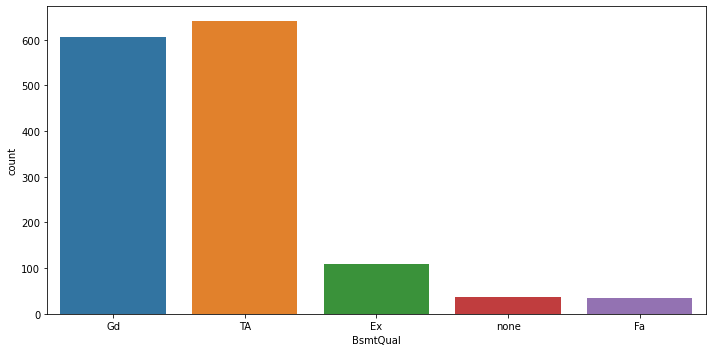

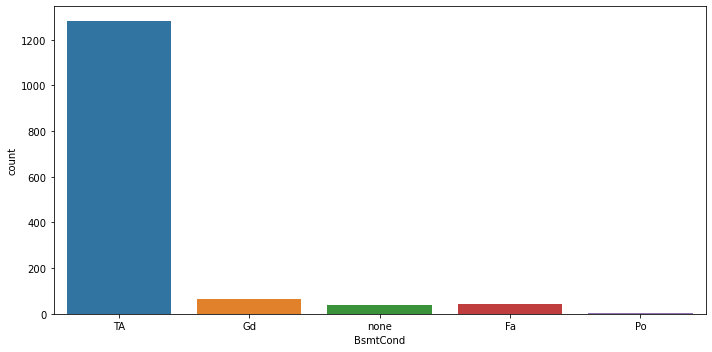

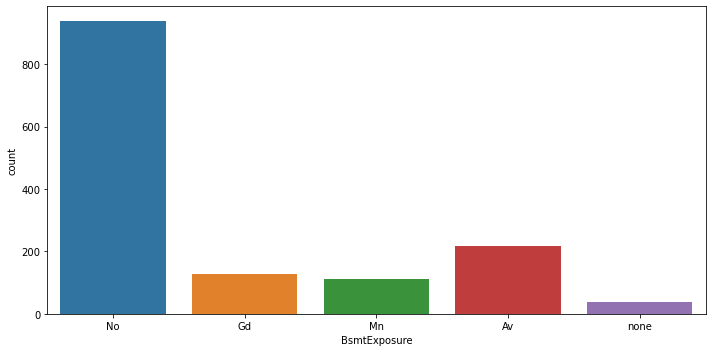

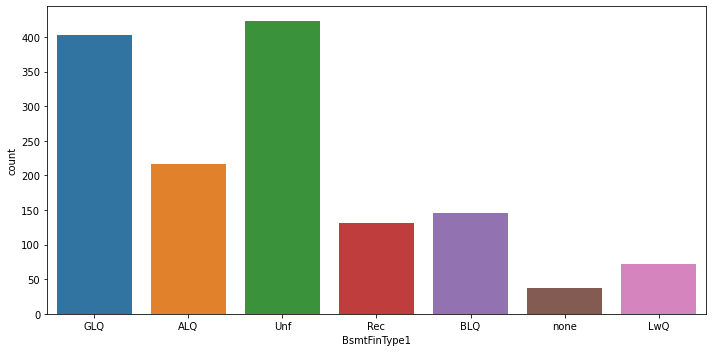

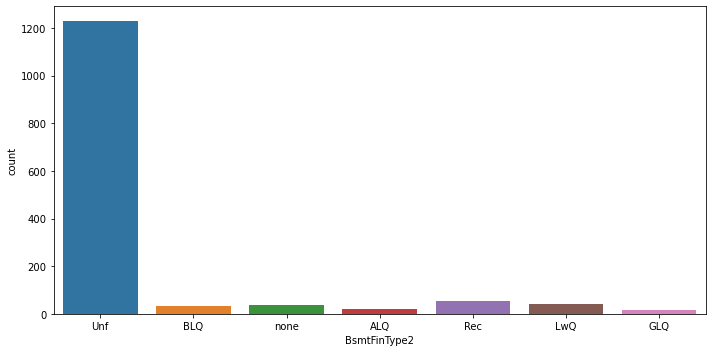

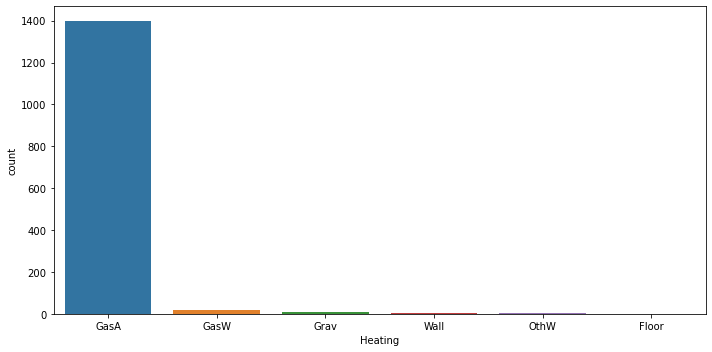

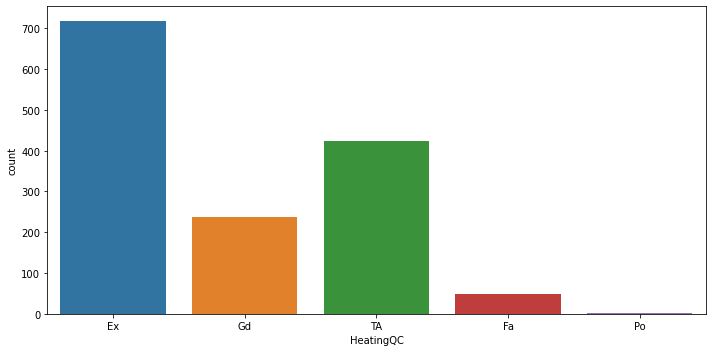

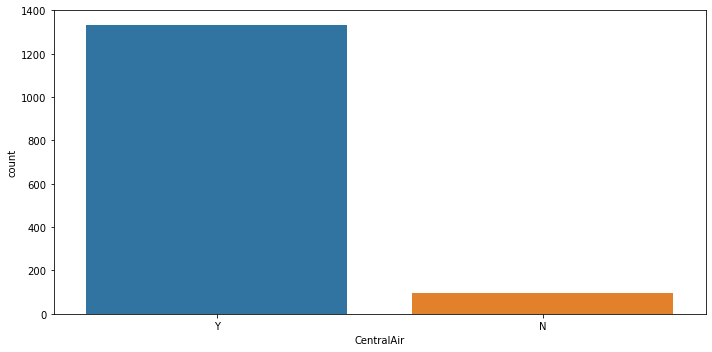

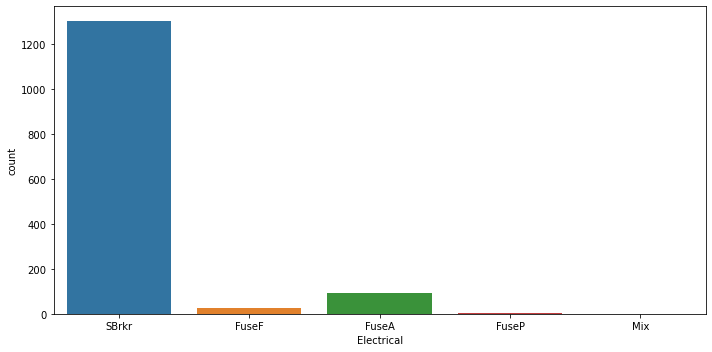

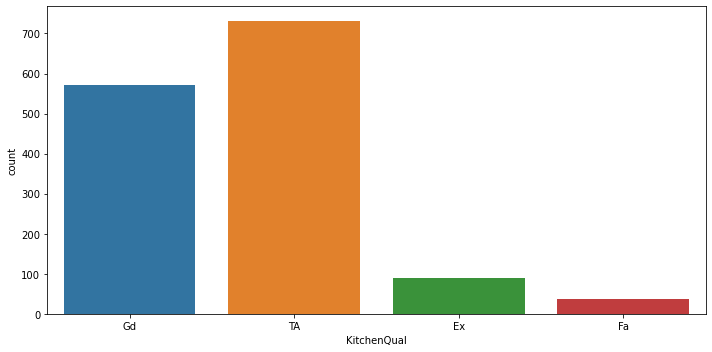

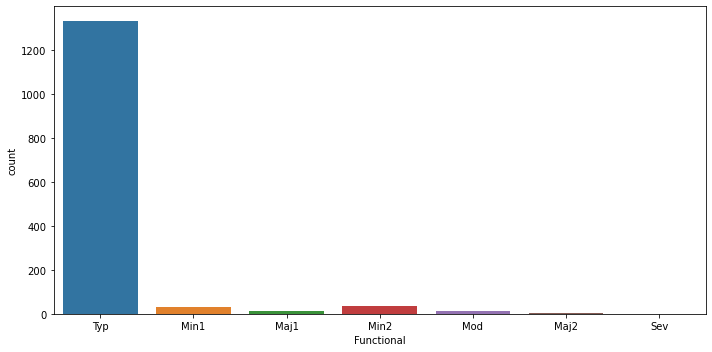

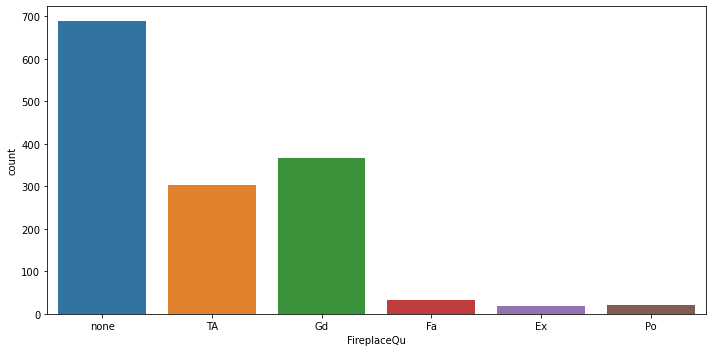

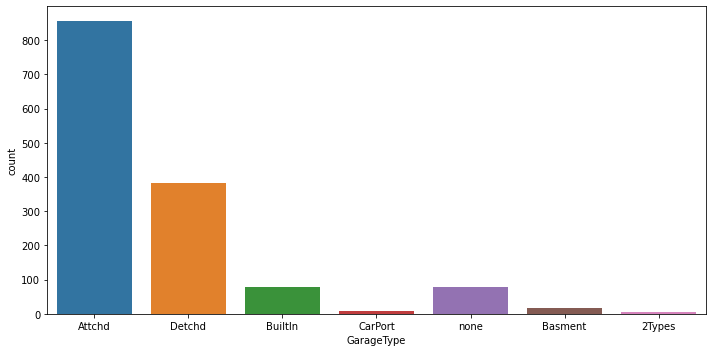

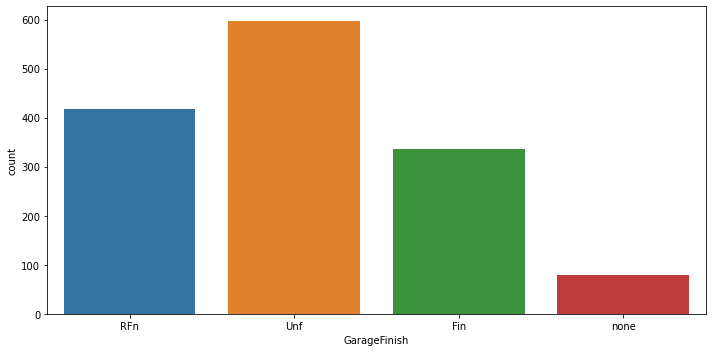

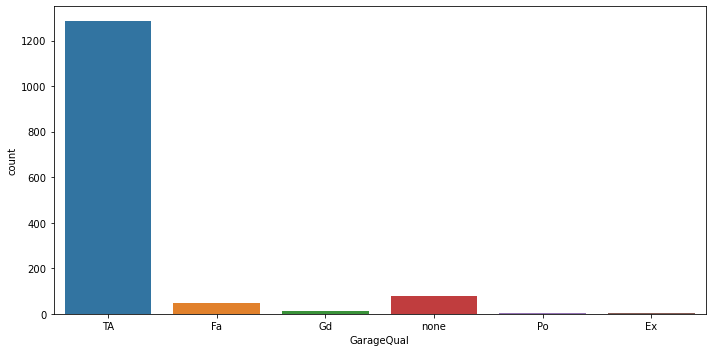

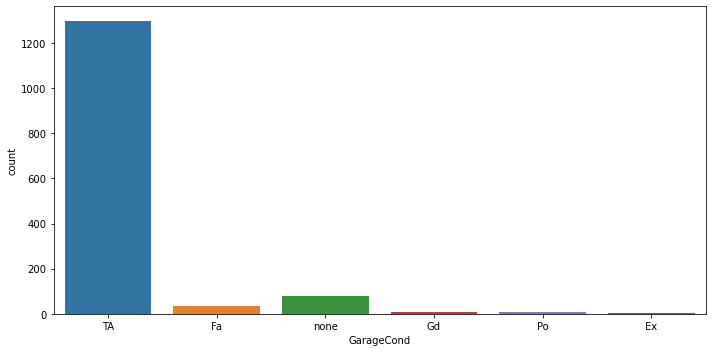

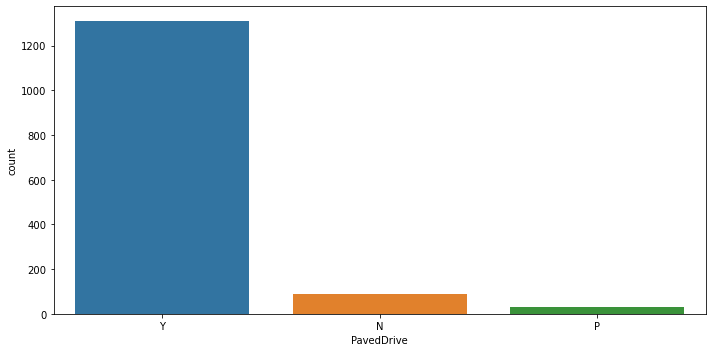

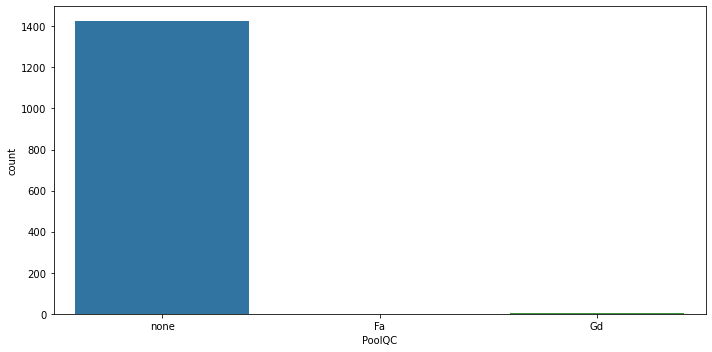

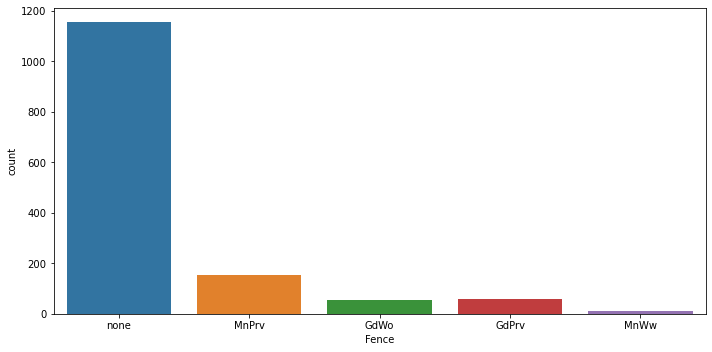

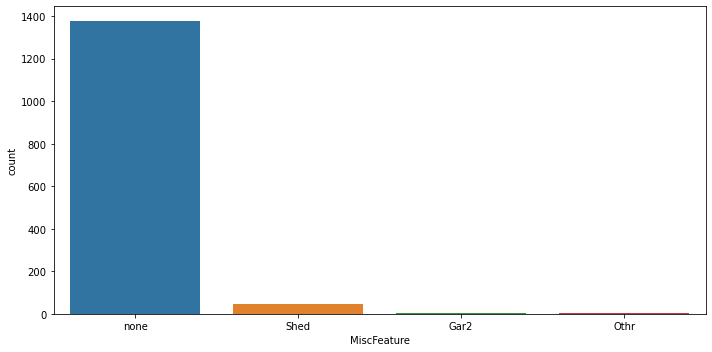

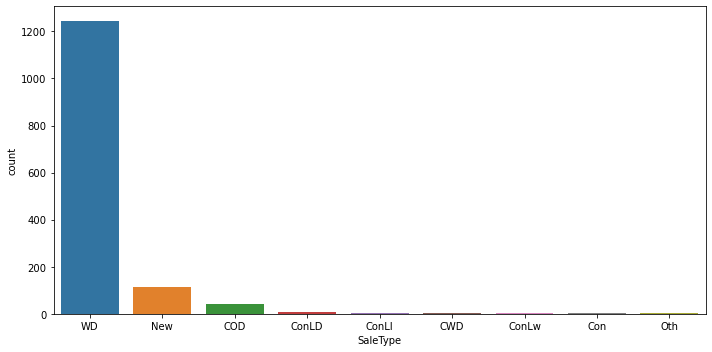

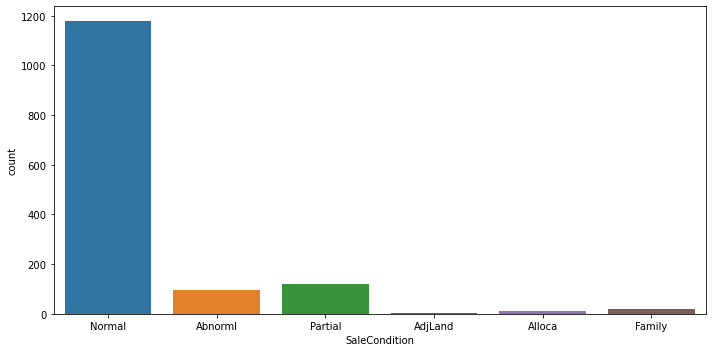

In [46]:
plt.rcParams['figure.figsize']=(10,5)
for i, col in enumerate(df3.columns):
    sns.countplot(df3[col])
    plt.tight_layout()
    plt.show()

In [47]:
df1 = df1.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional'],axis=1) 

### Dropping the columns as it has high null values, some of which are imputed. After imputing it was found that they are having low variance. So dropping these columns

In [48]:
df1.shape

(1429, 63)

# 4. Data Preparation

In [49]:
df1 = df1.drop(['Id'],axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,Property Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,none,WD,Normal,12.429220,8


In [50]:
numerical_columns = list(df1.select_dtypes(include='number'))
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'Property Age']


In [51]:
categorical_columns = list(df1.select_dtypes(include='object'))
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Creating dummy columns to convert numerical into categorical

In [52]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,Property Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [53]:
X = df1.drop(['SalePrice'],axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Property Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
y = df1['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [55]:
# Splitting the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property Age']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property Age']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property Age']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Property Age']])

In [57]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Property Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
127,-0.274878,-0.708617,-0.584255,-0.767909,1.287463,-0.560276,-0.749445,-0.293863,-0.876531,-0.855099,-0.787196,-0.110932,-1.422075,-0.824529,-0.241838,-1.019137,-0.738377,0.223630,-0.215318,0.627637,-2.226044,-0.760517,-0.708874,-0.371515,-0.108022,-0.266146,-0.054574,1.317224,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
687,2.457272,0.185308,-0.514223,0.723176,-0.523315,-0.560276,-0.457086,-0.293863,-1.169786,-1.670933,0.559115,-0.110932,-0.830295,-0.824529,-0.241838,0.850839,1.257237,-1.054254,-0.215318,-0.937542,0.055386,-0.760517,0.241020,-0.371515,-0.108022,-0.266146,-0.054574,-1.123423,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1315,0.081489,0.740992,0.068885,-0.022366,-0.523315,-0.560276,0.163286,1.426345,-0.197925,-0.143714,1.705067,-0.110932,1.450995,-0.824529,-0.241838,0.850839,1.257237,1.501513,-0.215318,2.192816,0.511673,1.520846,-0.708874,-0.371515,-0.108022,-0.266146,-0.054574,0.063919,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
149,-0.156089,-0.853578,-0.403364,-0.767909,-1.428703,-0.560276,-1.025166,-0.293863,-0.333646,-0.697013,0.307445,-0.110932,-0.283689,-0.824529,-0.241838,-1.019137,-0.738377,0.223630,-0.215318,-0.937542,-1.085329,0.869028,1.095923,-0.371515,-0.108022,-0.266146,-0.054574,1.086352,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1195,0.081489,-0.901898,-0.228627,-0.022366,-0.523315,-0.560276,-1.025166,-0.293863,-0.740810,-1.171270,0.991596,-0.110932,-0.030714,-0.824529,-0.241838,0.850839,1.257237,0.223630,-0.215318,-0.937542,-0.324852,0.054256,-0.328916,-0.371515,-0.108022,-0.266146,-0.054574,-1.123423,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [58]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Property Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
57,0.064418,0.928412,0.158776,0.652550,-0.503692,-0.623703,-0.991043,-0.272695,-0.518372,-0.795785,1.221986,-0.097164,0.486901,-0.803081,-0.238013,0.873599,1.217249,0.149055,-0.204313,-0.941619,0.477396,-0.715166,0.399237,-0.343871,-0.137834,-0.282747,0.0,-1.137785,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1143,-0.852941,0.088091,-0.140994,-0.816972,-2.327187,-0.623703,-0.344702,-0.272695,-0.142175,-0.396032,-0.794769,-0.097164,-1.047467,-0.803081,-0.238013,-1.028807,-0.775880,0.149055,-0.204313,-0.941619,-2.257181,-0.715166,-0.355702,-0.343871,-0.137834,-0.282747,0.0,0.473025,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
377,0.064418,1.535311,0.101882,1.387312,-0.503692,-0.623703,-0.991043,-0.272695,1.336847,1.175599,1.282958,-0.097164,2.090036,-0.803081,-0.238013,2.776005,-0.775880,1.378761,-0.204313,0.648754,0.695194,0.551674,2.762526,-0.343871,-0.137834,-0.282747,0.0,-1.103512,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
909,0.064418,3.729483,0.265764,-0.082211,-0.503692,-0.623703,-0.991043,-0.272695,-0.822422,-1.118873,0.945268,-0.097164,-0.020257,-0.803081,-0.238013,0.873599,1.217249,0.149055,-0.204313,0.648754,-0.369597,-0.428335,-0.355702,-0.343871,-0.137834,-0.282747,0.0,-1.069240,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
866,-0.852941,-0.098647,0.046688,1.387312,-0.503692,0.788622,-0.991043,-0.272695,1.486296,1.356309,-0.794769,-0.097164,0.327876,-0.803081,-0.238013,0.873599,-0.775880,0.149055,-0.204313,0.648754,1.953584,0.814603,0.563354,-0.343871,-0.137834,-0.282747,0.0,-1.172058,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


# 5. Model Building and Evaluation

In [59]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will use the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [60]:
# Running RFE 
# Since there are more than 200 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [61]:
# Checking the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 25),
 ('LotFrontage', False, 56),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 87),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 72),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 30),
 ('BsmtHalfBath', False, 91),
 ('FullBath', False, 50),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 37),
 ('Fireplaces', False, 68),
 ('GarageArea', False, 7),
 ('WoodDeckSF', False, 41),
 ('OpenPorchSF', False, 93),
 ('EnclosedPorch', False, 67),
 ('3SsnPorch', False, 61),
 ('ScreenPorch', False, 43),
 ('PoolArea', False, 74),
 ('Property Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 57),
 ('LotShape_IR3', False, 103),
 ('LotShape_Reg', False, 58),
 ('LandContour_HLS', False, 10)

In [62]:
# Select the top 100 variables
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Property Age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_MetalSd', 'Exterior1st_Stucco', 'Exterior1st_VinylSd

In [63]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageType_CarPort', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageQual_Gd', 'PavedDrive_Y', 'MiscFeature_Othr', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_AdjLand'],
      dtype='object', length=110)

In [64]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train[col])

In [65]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Property Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_StoneBr,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Twnhs,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_MetalSd,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_MetalSd,Exterior2nd_VinylSd,MasVnrType_Stone,ExterCond_Fa,ExterCond_Po,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_LwQ,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_none,HeatingQC_Po,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,FireplaceQu_none,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,MiscFeature_Shed,MiscFeature_none,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
127,-0.584255,-0.767909,1.287463,-0.749445,-0.876531,-0.855099,-0.787196,-0.110932,-1.422075,1.317224,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
687,-0.514223,0.723176,-0.523315,-0.457086,-1.169786,-1.670933,0.559115,-0.110932,-0.830295,-1.123423,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
1315,0.068885,-0.022366,-0.523315,0.163286,-0.197925,-0.143714,1.705067,-0.110932,1.450995,0.063919,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
149,-0.403364,-0.767909,-1.428703,-1.025166,-0.333646,-0.697013,0.307445,-0.110932,-0.283689,1.086352,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1195,-0.228627,-0.022366,-0.523315,-1.025166,-0.740810,-1.171270,0.991596,-0.110932,-0.030714,-1.123423,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [66]:
X_train_rfe.shape

(1000, 100)

In [67]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.931991701339472

In [68]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.418252247680279e+21

### The R2 is too low, need to check for some alternate methods of Regression

In [69]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 25),
 ('LotFrontage', False, 56),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 87),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 72),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 30),
 ('BsmtHalfBath', False, 91),
 ('FullBath', False, 50),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 37),
 ('Fireplaces', False, 68),
 ('GarageArea', False, 7),
 ('WoodDeckSF', False, 41),
 ('OpenPorchSF', False, 93),
 ('EnclosedPorch', False, 67),
 ('3SsnPorch', False, 61),
 ('ScreenPorch', False, 43),
 ('PoolArea', False, 74),
 ('Property Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 57),
 ('LotShape_IR3', False, 103),
 ('LotShape_Reg', False, 58),
 ('LandContour_HLS', False, 10)

In [70]:
# Select the top 100 variables
col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Property Age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SLvl', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_MetalSd', 'Exterior1st_Stucco', 'Exterior1st_VinylSd

In [71]:
X_test_rfe = X_test[col1]

In [72]:
X_test_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Property Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_StoneBr,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Twnhs,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_MetalSd,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_MetalSd,Exterior2nd_VinylSd,MasVnrType_Stone,ExterCond_Fa,ExterCond_Po,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_LwQ,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_none,HeatingQC_Po,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Po,FireplaceQu_none,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,MiscFeature_Shed,MiscFeature_none,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
57,0.158776,0.652550,-0.503692,-0.991043,-0.518372,-0.795785,1.221986,-0.097164,0.486901,-1.137785,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
1143,-0.140994,-0.816972,-2.327187,-0.344702,-0.142175,-0.396032,-0.794769,-0.097164,-1.047467,0.473025,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
377,0.101882,1.387312,-0.503692,-0.991043,1.336847,1.175599,1.282958,-0.097164,2.090036,-1.103512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
909,0.265764,-0.082211,-0.503692,-0.991043,-0.822422,-1.118873,0.945268,-0.097164,-0.020257,-1.069240,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
866,0.046688,1.387312,-0.503692,-0.991043,1.486296,1.356309,-0.794769,-0.097164,0.327876,-1.172058,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


# 6. Lasso and Ridge Regression

### Lasso Regression

In [73]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 210)
y_train (1000,)


In [74]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058946,0.009782,0.003586,0.007172,0.0001,{'alpha': 0.0001},-0.077211,-0.090249,-0.087755,-0.078430,-0.084919,-0.083713,0.005113,2,-0.066597,-0.064354,-0.063544,-0.065626,-0.062887,-0.064602,0.001353
1,0.008313,0.007108,0.006314,0.007733,0.001,{'alpha': 0.001},-0.081148,-0.088313,-0.082582,-0.077889,-0.084998,-0.082986,0.003520,1,-0.075120,-0.074144,-0.074812,-0.075494,-0.073856,-0.074685,0.000607
2,0.005306,0.006729,0.004303,0.006230,0.01,{'alpha': 0.01},-0.094346,-0.095789,-0.089883,-0.090404,-0.092652,-0.092615,0.002255,3,-0.089474,-0.089204,-0.090572,-0.091766,-0.089965,-0.090196,0.000913
3,0.006292,0.007707,0.003198,0.006396,0.05,{'alpha': 0.05},-0.121514,-0.127081,-0.117271,-0.116631,-0.106351,-0.117770,0.006821,4,-0.118008,-0.114789,-0.116993,-0.115933,-0.117510,-0.116646,0.001156
4,0.006362,0.007792,0.003124,0.006249,0.1,{'alpha': 0.1},-0.161763,-0.163660,-0.151220,-0.149130,-0.140432,-0.153241,0.008558,5,-0.152943,-0.152250,-0.152714,-0.150480,-0.152758,-0.152229,0.000904


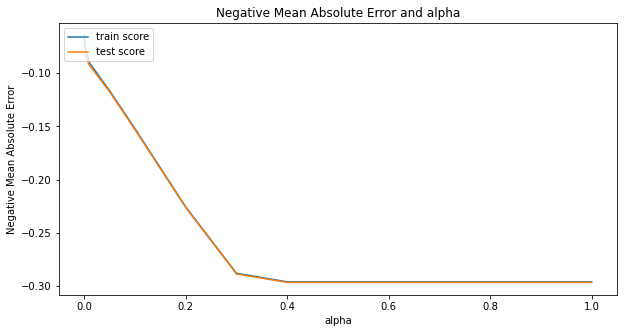

In [76]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.**

In [77]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00340285,  0.00821695,  0.01481995,  0.11630582,  0.04920882,
        0.        ,  0.03039859,  0.        ,  0.04775411,  0.        ,
        0.        , -0.        ,  0.11972762,  0.00935512,  0.        ,
        0.002556  ,  0.        , -0.        , -0.00771855,  0.01909296,
        0.0374125 ,  0.00798942,  0.        ,  0.        ,  0.        ,
        0.0047448 ,  0.        , -0.09193854,  0.        , -0.        ,
        0.00460382, -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

**The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero**

In [78]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.996),
 ('MSSubClass', -0.003),
 ('LotFrontage', 0.008),
 ('LotArea', 0.015),
 ('OverallQual', 0.116),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.048),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.12),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.003),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.019),
 ('GarageArea', 0.037),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('Property Age', -0.092),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.005),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR

In [79]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8838046164199649
0.8928453536105697


In [80]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1271468653077145


In [81]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [82]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.996
1,MSSubClass,-0.003
2,LotFrontage,0.008
3,LotArea,0.015
4,OverallQual,0.116


In [83]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.996
13,GrLivArea,0.120
4,OverallQual,0.116
5,OverallCond,0.049
9,TotalBsmtSF,0.048
...,...,...
85,HouseStyle_2Story,0.000
210,SaleCondition_Partial,0.000
1,MSSubClass,-0.003
19,KitchenAbvGr,-0.008


In [84]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.996
13,GrLivArea,0.120
4,OverallQual,0.116
5,OverallCond,0.049
9,TotalBsmtSF,0.048
21,GarageArea,0.037
7,BsmtFinSF1,0.030
20,Fireplaces,0.019
3,LotArea,0.015
14,BsmtFullBath,0.009


In [85]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(19, 2)

In [86]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'BsmtFullBath', 'LotFrontage', 'WoodDeckSF', 'Foundation_PConc', 'ScreenPorch', 'MSZoning_RL', 'FullBath', 'MSSubClass', 'KitchenAbvGr', 'Property Age']


In [87]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
127,-1.422075,-0.767909,1.287463,-0.876531,-2.226044,-0.749445,0.627637,-0.584255,-0.708617,-0.824529,0,-0.708874,-1.019137,-0.266146,-0.760517
687,-0.830295,0.723176,-0.523315,-1.169786,0.055386,-0.457086,-0.937542,-0.514223,0.185308,-0.824529,1,0.241020,0.850839,-0.266146,-0.760517
1315,1.450995,-0.022366,-0.523315,-0.197925,0.511673,0.163286,2.192816,0.068885,0.740992,-0.824529,0,-0.708874,0.850839,-0.266146,1.520846
149,-0.283689,-0.767909,-1.428703,-0.333646,-1.085329,-1.025166,-0.937542,-0.403364,-0.853578,-0.824529,0,1.095923,-1.019137,-0.266146,0.869028
1195,-0.030714,-0.022366,-0.523315,-0.740810,-0.324852,-1.025166,-0.937542,-0.228627,-0.901898,-0.824529,1,-0.328916,0.850839,-0.266146,0.054256


In [88]:
X_train_lasso.shape

(1000, 15)

In [89]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
57,0.486901,0.652550,-0.503692,-0.518372,0.477396,-0.991043,-0.941619,0.158776,0.928412,-0.803081,1,0.399237,0.873599,-0.282747,-0.715166
1143,-1.047467,-0.816972,-2.327187,-0.142175,-2.257181,-0.344702,-0.941619,-0.140994,0.088091,-0.803081,0,-0.355702,-1.028807,-0.282747,-0.715166
377,2.090036,1.387312,-0.503692,1.336847,0.695194,-0.991043,0.648754,0.101882,1.535311,-0.803081,1,2.762526,2.776005,-0.282747,0.551674
909,-0.020257,-0.082211,-0.503692,-0.822422,-0.369597,-0.991043,0.648754,0.265764,3.729483,-0.803081,1,-0.355702,0.873599,-0.282747,-0.428335
866,0.327876,1.387312,-0.503692,1.486296,1.953584,-0.991043,0.648754,0.046688,-0.098647,-0.803081,1,0.563354,0.873599,-0.282747,0.814603


### Ridge Regression

In [90]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019626,0.012760,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.082789,-0.093324,-0.094551,-0.084438,-0.090164,-0.089053,0.004696,26,-0.064229,-0.062397,-0.061558,-0.063434,-0.061530,-0.062630,0.001060
1,0.003124,0.006249,0.006250,0.007655,0.001,{'alpha': 0.001},-0.082740,-0.093300,-0.094532,-0.084422,-0.090143,-0.089027,0.004702,25,-0.064233,-0.062398,-0.061560,-0.063436,-0.061527,-0.062631,0.001061
2,0.003128,0.006255,0.000000,0.000000,0.01,{'alpha': 0.01},-0.082283,-0.093075,-0.094350,-0.084266,-0.089945,-0.088784,0.004763,24,-0.064277,-0.062406,-0.061582,-0.063455,-0.061502,-0.062644,0.001078
3,0.000000,0.000000,0.006249,0.007654,0.05,{'alpha': 0.05},-0.080753,-0.092416,-0.093606,-0.083640,-0.089339,-0.087951,0.004985,23,-0.064446,-0.062479,-0.061686,-0.063533,-0.061459,-0.062721,0.001127
4,0.006249,0.007654,0.003202,0.004356,0.1,{'alpha': 0.1},-0.079484,-0.092002,-0.092923,-0.082993,-0.088874,-0.087255,0.005212,22,-0.064601,-0.062582,-0.061801,-0.063632,-0.061427,-0.062809,0.001172


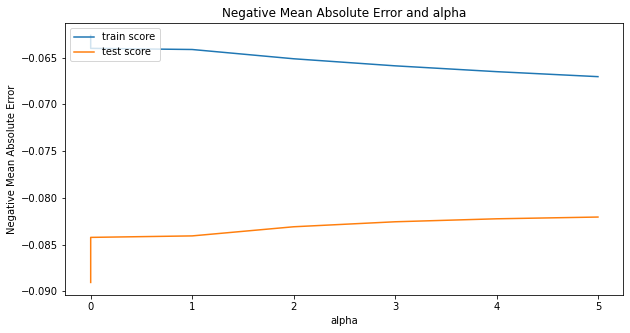

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis**

In [93]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.18041641e-02,  8.68590992e-03,  2.54914464e-02,  6.36790283e-02,
        5.23229808e-02,  2.31526603e-03,  2.33272671e-02,  9.25686008e-03,
        4.37461414e-02,  3.29481363e-02,  4.24447519e-02,  5.42376357e-03,
        6.60976058e-02,  1.51717637e-02,  3.28198667e-03,  1.24134627e-02,
        1.16102754e-02,  4.12447886e-04, -1.03300011e-02,  8.84512331e-03,
        2.76824583e-02,  1.43613040e-02,  1.30166867e-03,  8.83540141e-03,
        7.57447940e-03,  1.32192731e-02,  9.18708901e-03, -5.79340878e-02,
        1.29984250e-01,  9.38459844e-02,  1.16964018e-01,  7.67680864e-02,
        1.28681484e-02,  8.97552596e-04,  1.07406856e-02,  1.38381134e-02,
       -3.34136759e-02,  4.46964838e-03,  3.16073051e-02, -2.84682502e-02,
       -2.19368168e-02, -1.92824073e-02,  1.00300308e-03, -1.13064378e-01,
       -3.86707000e-02, -5.20653306e-02,  3.10377371e-02,  4.94145645e-02,
       -1.29482755e-02,  1.28503196e-01, -5.18283548e-02, -8.15480072e-03,
       -4.58016780e-02, -

In [94]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.698),
 ('MSSubClass', -0.012),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.064),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.033),
 ('2ndFlrSF', 0.042),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.066),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.012),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', 0.009),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.009),
 ('Property Age', -0.058),
 ('MSZoning_FV', 0.13),
 ('MSZoning_RH', 0.094),
 ('MSZoning_RL', 0.117),
 ('MSZoning_RM', 0.077),
 ('LotShape_IR2', 0.013),
 ('LotShape_IR3', 0.001),
 ('LotShape_Reg', 0.011),
 ('LandContour_HLS', 0.014),
 ('LandContour_Low', -0.033),
 ('LandContour_Lvl', 0.004),
 ('LotConfig_CulDSac', 0.032),
 ('

In [95]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9373724107143033
0.9092012798882626


In [96]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11704153722169439


**It is visible that the model performance is better than Lasso. The train and the test scores are matching well**

In [97]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [98]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.698
29,MSZoning_FV,0.130
50,Neighborhood_Crawfor,0.129
203,SaleType_New,0.122
31,MSZoning_RL,0.117
66,Neighborhood_StoneBr,0.102
209,SaleCondition_Normal,0.098
30,MSZoning_RH,0.094
207,SaleCondition_Alloca,0.086
32,MSZoning_RM,0.077


In [99]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.698
29,MSZoning_FV,0.130
50,Neighborhood_Crawfor,0.129
203,SaleType_New,0.122
31,MSZoning_RL,0.117
...,...,...
126,ExterQual_Fa,-0.068
94,Exterior1st_BrkComm,-0.081
83,HouseStyle_2.5Fin,-0.093
44,LandSlope_Sev,-0.113


In [100]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.698
29,MSZoning_FV,0.130
50,Neighborhood_Crawfor,0.129
203,SaleType_New,0.122
31,MSZoning_RL,0.117
...,...,...
126,ExterQual_Fa,-0.068
94,Exterior1st_BrkComm,-0.081
83,HouseStyle_2.5Fin,-0.093
44,LandSlope_Sev,-0.113


In [101]:
predRFE.shape

(206, 2)

### Observation:

- Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.
- It is always advisable to use simple yet robust model.
- Equation can be formulated using the features and coefficients obtained by Lasso

In [103]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']), inplace = True) 
pred

,Variable,Coeff
C,constant,11.996
x1,GrLivArea,0.120
x2,OverallQual,0.116
x3,OverallCond,0.049
x4,TotalBsmtSF,0.048
x5,GarageArea,0.037
x6,BsmtFinSF1,0.030
x7,Fireplaces,0.019
x8,LotArea,0.015
x9,BsmtFullBath,0.009


### The above are the final features that should be selected for predicting the price of house

#### Hence the equation:

##### Log(Y) = C + 0.120(x1) + 0.116(x2) + 0.049(x3) + 0.048(x4) + 0.037(x5) + 0.030(x6) + 0.019(x7) + 0.015(x8) + 0.009(x9) + 0.008(x10) +  0.008(x11) + 0.006(x12) + 0.005(x13) + 0.005(x14) + 0.003(x15) - 0.003(x16) - 0.008(x17) - 0.092(x18) + Error term(RSS + alpha * (sum of absolute value of coefficients)

## 7. Inference

**Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.**

**The higher values of positive coeeficients suggest a high sale value.**

**Some of those features are:-**

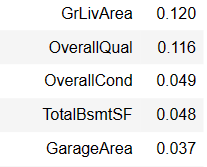

**The higher values of negative coeeficients suggest a decrease in sale value.**

**Some of those features are:-**

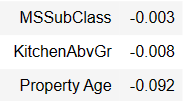

#### Suggestion:
    
- When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

### END